# Top 5 European Leagues Player Analysis 🏆⚽

 A Comprehensive Analysis of Player Performance Across Europe's Elite Leagues
 ## Table of Contents
1. [Introduction](#introduction)
2. [Data Overview](#data-overview)
3. [Data Cleaning & Preparation](#data-cleaning)
4. [Exploratory Data Analysis](#eda)
5. [Performance Analysis](#performance-analysis)
6. [League Comparisons](#league-comparisons)
7. [Player Profiling](#player-profiling)
8. [Statistical Insights](#statistical-insights)
9. [Key Insights & Player Spotlight](#Key-Insights-&-Player-Spotlight)
10. [Interactive Dashbord Creation](Interactive-Dashbord-Creation)
11. [Conclusions](#Conclusions)

## 1. Introduction 

This notebook provides a comprehensive analysis of player performance across Europe's top 5 leagues:
- **Premier League** (England)
- **La Liga** (Spain)
- **Bundesliga** (Germany)
- **Serie A** (Italy)
- **Ligue 1** (France)

We'll explore various aspects including goals, assists, expected goals (xG), playing time, and positional analysis to uncover insights about player performance and league characteristics.

### Key Metrics Analyzed:
- **Basic Stats**: Goals, Assists, Minutes Played
- **Advanced Metrics**: xG (Expected Goals), xAG (Expected Assists), Progressive Actions
- **Per 90 Minutes**: Normalized performance metrics
- **Disciplinary**: Cards and fouls

## 2. Data Overview & Setup 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set styling
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [2]:
#Load the dataset
df = pd.read_excel("/kaggle/input/all-football-players-stats-in-top-5-leagues-2425/top5-players24-25.xlsx")

In [3]:
print("🔍 Dataset Overview")
print("=" * 50)
print(f"Dataset Shape: {df.shape}")
print(f"Total Players: {df.shape[0]:,}")
print(f"Features: {df.shape[1]}")

🔍 Dataset Overview
Dataset Shape: (2854, 37)
Total Players: 2,854
Features: 37


In [4]:
# Display basic information about the dataset
print("\n📊 Dataset Info:")
print(df.info())

print("\n🎯 First 5 rows:")
df.head()


📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2854 entries, 0 to 2853
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rk           2854 non-null   int64  
 1   Player       2854 non-null   object 
 2   Nation       2847 non-null   object 
 3   Pos          2854 non-null   object 
 4   Squad        2854 non-null   object 
 5   Comp         2854 non-null   object 
 6   Age          2846 non-null   float64
 7   Born         2846 non-null   float64
 8   MP           2854 non-null   int64  
 9   Starts       2854 non-null   int64  
 10  Min          2854 non-null   int64  
 11  90s          2854 non-null   float64
 12  Gls          2854 non-null   int64  
 13  Ast          2854 non-null   int64  
 14  G+A          2854 non-null   int64  
 15  G-PK         2854 non-null   int64  
 16  PK           2854 non-null   int64  
 17  PKatt        2854 non-null   int64  
 18  CrdY         2854 non-null   in

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24.0,2000.0,3,1,86,1.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,8,3,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
1,2,Max Aarons,eng ENG,"DF,MF",Valencia,es La Liga,24.0,2000.0,4,1,120,1.3,0,0,0,0,0,0,2,0,0.0,0.0,0.0,0.0,0,6,10,0.0,0.0,0.0,0.0,0.0,0.00,0.02,0.02,0.00,0.02
2,3,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21.0,2003.0,1,1,65,0.7,0,0,0,0,0,0,1,0,0.1,0.1,0.0,0.1,3,2,3,0.0,0.0,0.0,0.0,0.0,0.10,0.00,0.10,0.10,0.10
3,4,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,20.0,2004.0,6,0,88,1.0,0,0,0,0,0,0,1,0,0.1,0.1,0.0,0.1,3,4,1,0.0,0.0,0.0,0.0,0.0,0.06,0.00,0.06,0.06,0.06
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,2006.0,1,0,3,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00


## 3. Data Cleaning & Preparation

In [5]:
# Check for missing values
print("🔍 Missing Values Analysis:")
print("=" * 40)
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percentage
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

🔍 Missing Values Analysis:
        Missing Count  Percentage
Age                 8    0.280308
Born                8    0.280308
Nation              7    0.245270


In [6]:
# Handle missing values
print(f"\n🔧 Handling missing values...")
df['Nation'] = df['Nation'].fillna('Unknown')
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Born'] = df['Born'].fillna(df['Born'].median())

print("✅ Missing values handled successfully!")


🔧 Handling missing values...
✅ Missing values handled successfully!


In [7]:
# Create additional features for analysis
print("🔨 Engineering additional features...")

# Playing time categories
df['Playing_Time_Category'] = pd.cut(df['Min'], 
                                   bins=[0, 500, 1000, 2000, float('inf')],
                                   labels=['Limited', 'Rotation', 'Regular', 'Key Player'])

# Performance efficiency
df['Goal_Efficiency'] = df['Gls'] / (df['90s'] + 0.00001)  # Goals per 90 minutes
df['Assist_Efficiency'] = df['Ast'] / (df['90s'] + 0.00001)  # Assists per 90 minutes

# Age groups
df['Age_Group'] = pd.cut(df['Age'], 
                        bins=[0, 21, 25, 30, 35, float('inf')],
                        labels=['Youth', 'Young', 'Prime', 'Veteran', 'Experienced'])

# xG performance vs actual
df['xG_Overperformance'] = df['Gls'] - df['xG']
df['xA_Overperformance'] = df['Ast'] - df['xAG']

print("✅ Feature engineering completed!")

# Display updated dataset info
print(f"\n📈 Updated dataset shape: {df.shape}")

🔨 Engineering additional features...
✅ Feature engineering completed!

📈 Updated dataset shape: (2854, 43)


## 4. Exploratory Data Analysis

### 4.1 League Distribution

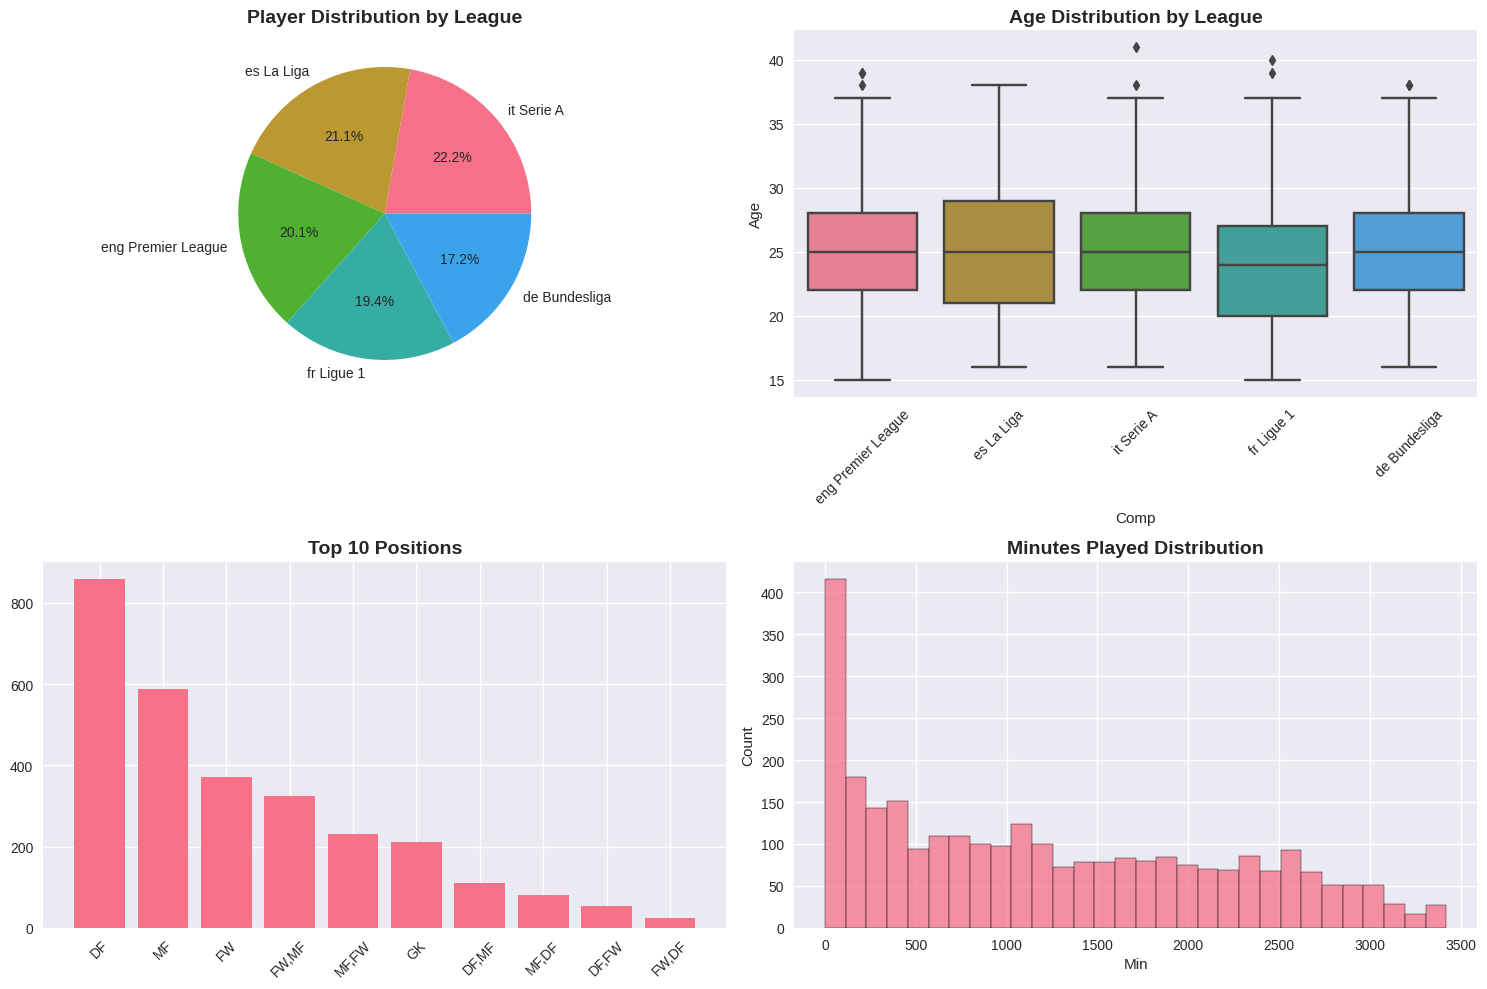

In [8]:
# League distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Players by league
league_counts = df['Comp'].value_counts()
axes[0, 0].pie(league_counts.values, labels=league_counts.index, autopct='%1.1f%%')
axes[0, 0].set_title('Player Distribution by League', fontsize=14, fontweight='bold')

# Age distribution by league
sns.boxplot(data=df, x='Comp', y='Age', ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution by League', fontsize=14, fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)

# Position distribution
position_counts = df['Pos'].value_counts().head(10)
axes[1, 0].bar(position_counts.index, position_counts.values)
axes[1, 0].set_title('Top 10 Positions', fontsize=14, fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)

# Minutes played distribution
sns.histplot(data=df, x='Min', bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Minutes Played Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 4.2 Performance Metrics Distribution


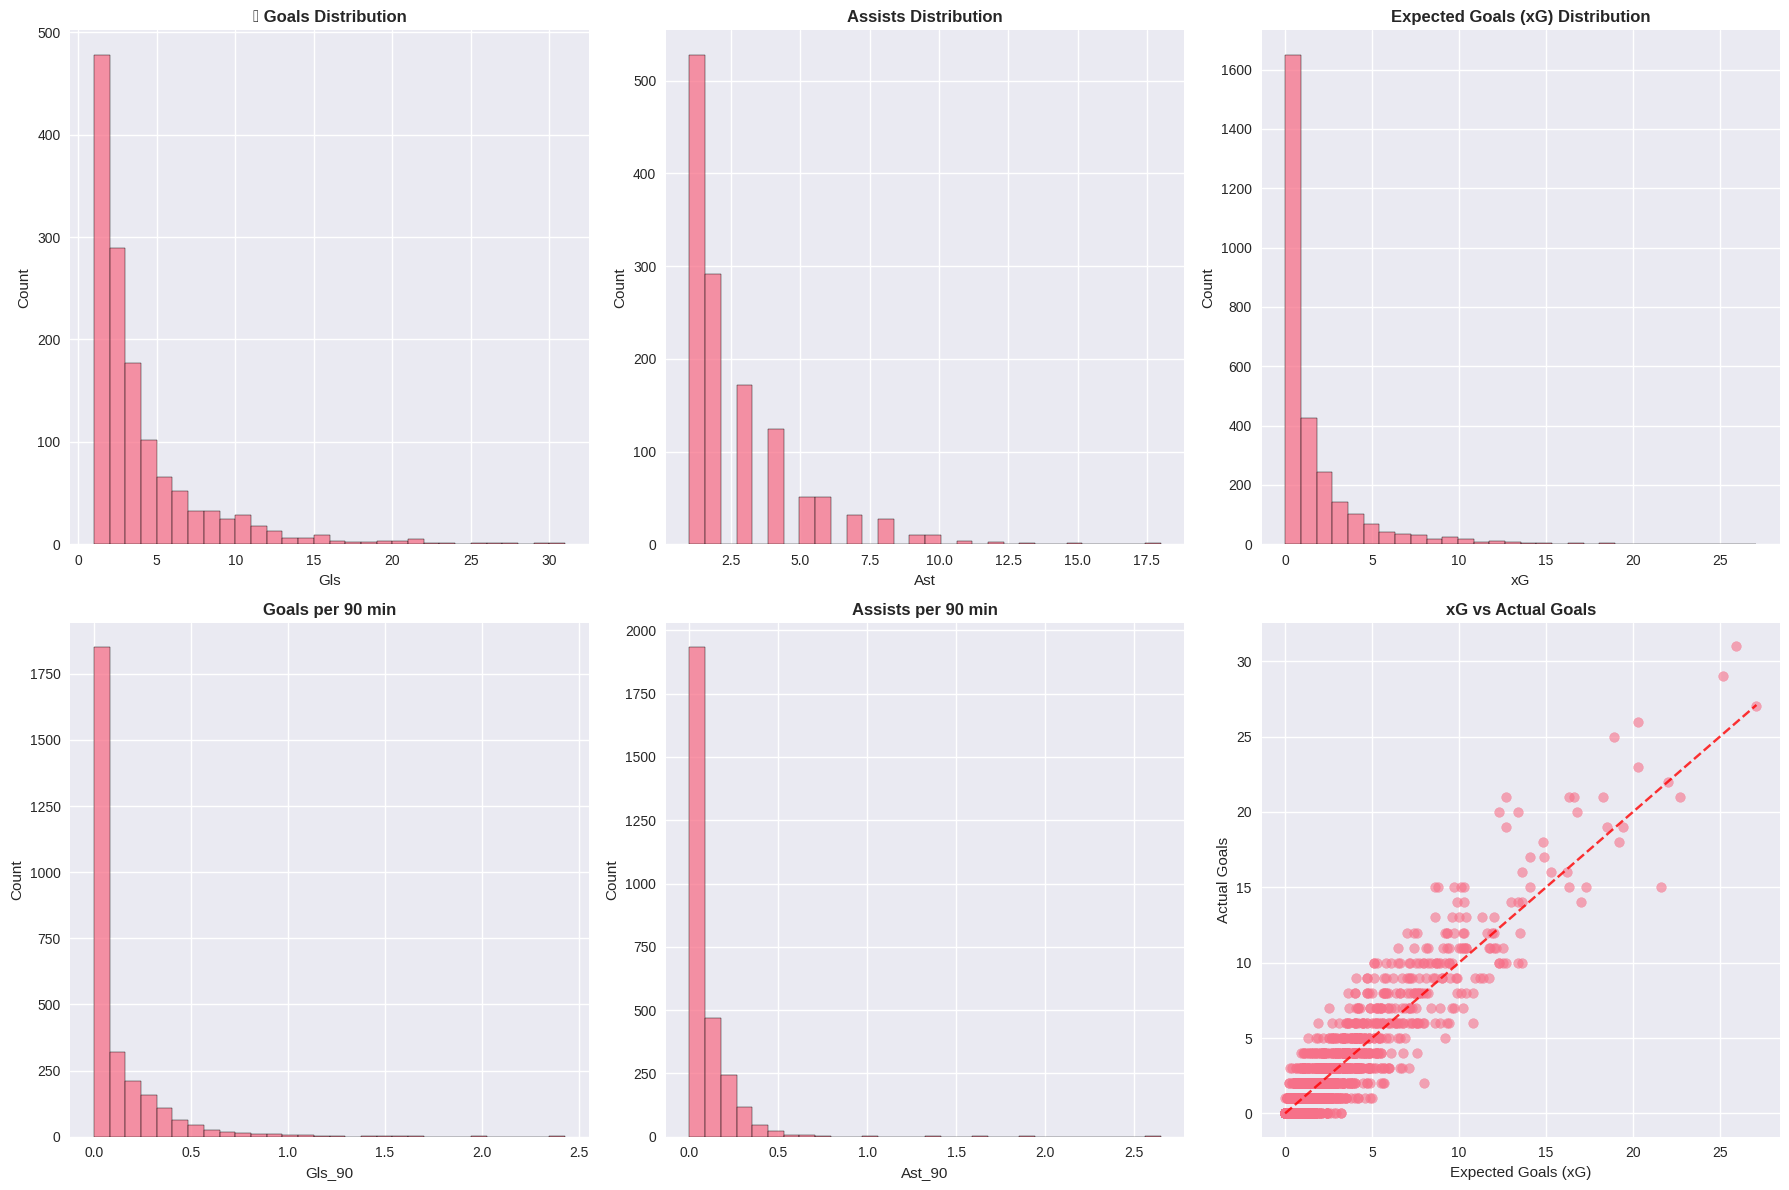

In [9]:
# Performance metrics overview
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Goals distribution
sns.histplot(data=df[df['Gls'] > 0], x='Gls', bins=30, ax=axes[0, 0])
axes[0, 0].set_title('🥅 Goals Distribution', fontsize=12, fontweight='bold')

# Assists distribution
sns.histplot(data=df[df['Ast'] > 0], x='Ast', bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Assists Distribution', fontsize=12, fontweight='bold')

# xG distribution
sns.histplot(data=df, x='xG', bins=30, ax=axes[0, 2])
axes[0, 2].set_title('Expected Goals (xG) Distribution', fontsize=12, fontweight='bold')

# Goals per 90 minutes
sns.histplot(data=df, x='Gls_90', bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Goals per 90 min', fontsize=12, fontweight='bold')

# Assists per 90 minutes
sns.histplot(data=df, x='Ast_90', bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Assists per 90 min', fontsize=12, fontweight='bold')

# xG vs Actual Goals
axes[1, 2].scatter(df['xG'], df['Gls'], alpha=0.6)
axes[1, 2].plot([0, df['xG'].max()], [0, df['xG'].max()], 'r--', alpha=0.8)
axes[1, 2].set_xlabel('Expected Goals (xG)')
axes[1, 2].set_ylabel('Actual Goals')
axes[1, 2].set_title('xG vs Actual Goals', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Performance Analysis

### 5.1 Top Performers

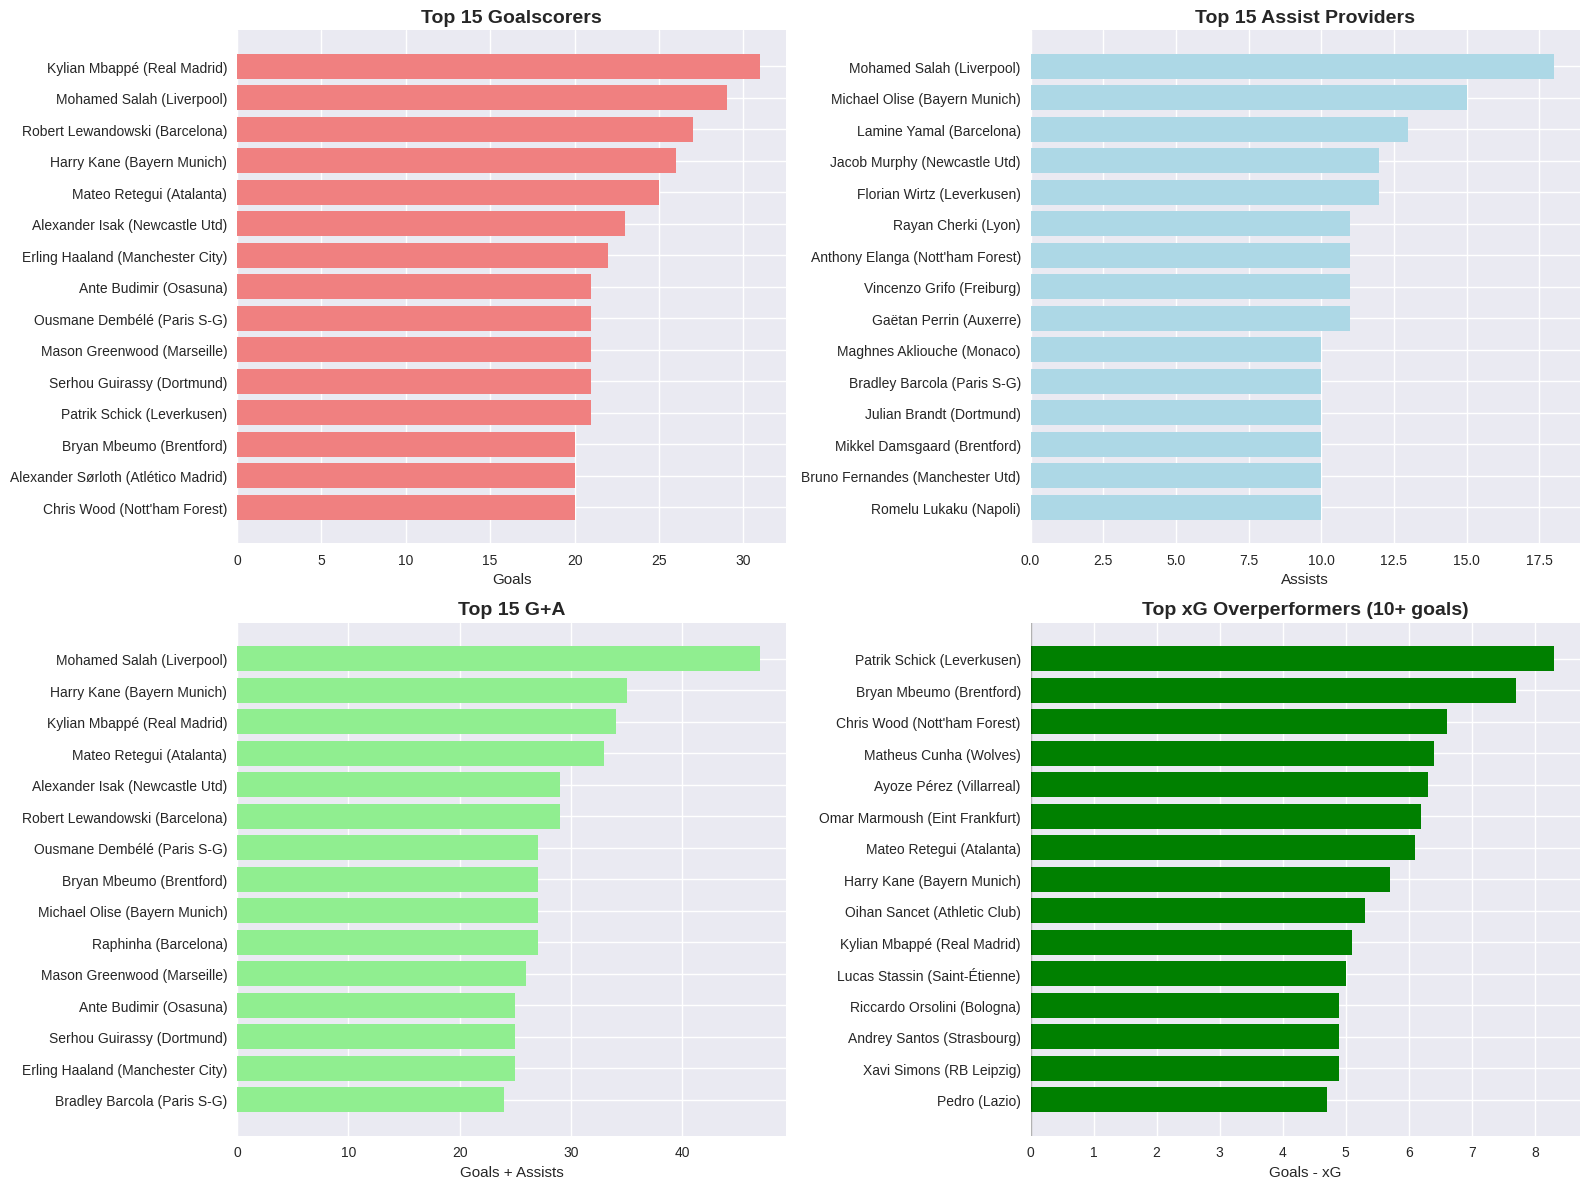

In [10]:
def create_top_performers_analysis():
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Top goalscorers
    top_scorers = df.nlargest(15, 'Gls')[['Player', 'Squad', 'Comp', 'Gls', 'xG']]
    y_pos = np.arange(len(top_scorers))
    
    axes[0, 0].barh(y_pos, top_scorers['Gls'], color='lightcoral')
    axes[0, 0].set_yticks(y_pos)
    axes[0, 0].set_yticklabels([f"{p} ({s})" for p, s in zip(top_scorers['Player'], top_scorers['Squad'])])
    axes[0, 0].set_xlabel('Goals')
    axes[0, 0].set_title('Top 15 Goalscorers', fontsize=14, fontweight='bold')
    axes[0, 0].invert_yaxis()
    
    # Top assists
    top_assists = df.nlargest(15, 'Ast')[['Player', 'Squad', 'Comp', 'Ast', 'xAG']]
    y_pos = np.arange(len(top_assists))
    
    axes[0, 1].barh(y_pos, top_assists['Ast'], color='lightblue')
    axes[0, 1].set_yticks(y_pos)
    axes[0, 1].set_yticklabels([f"{p} ({s})" for p, s in zip(top_assists['Player'], top_assists['Squad'])])
    axes[0, 1].set_xlabel('Assists')
    axes[0, 1].set_title('Top 15 Assist Providers', fontsize=14, fontweight='bold')
    axes[0, 1].invert_yaxis()
    
    # Top G+A
    top_ga = df.nlargest(15, 'G+A')[['Player', 'Squad', 'Comp', 'G+A']]
    y_pos = np.arange(len(top_ga))
    
    axes[1, 0].barh(y_pos, top_ga['G+A'], color='lightgreen')
    axes[1, 0].set_yticks(y_pos)
    axes[1, 0].set_yticklabels([f"{p} ({s})" for p, s in zip(top_ga['Player'], top_ga['Squad'])])
    axes[1, 0].set_xlabel('Goals + Assists')
    axes[1, 0].set_title('Top 15 G+A', fontsize=14, fontweight='bold')
    axes[1, 0].invert_yaxis()
    
    # Top xG overperformers (min 10 goals)
    top_overperform = df[df['Gls'] >= 10].nlargest(15, 'xG_Overperformance')[['Player', 'Squad', 'Gls', 'xG', 'xG_Overperformance']]
    y_pos = np.arange(len(top_overperform))
    
    colors = ['green' if x > 0 else 'red' for x in top_overperform['xG_Overperformance']]
    axes[1, 1].barh(y_pos, top_overperform['xG_Overperformance'], color=colors)
    axes[1, 1].set_yticks(y_pos)
    axes[1, 1].set_yticklabels([f"{p} ({s})" for p, s in zip(top_overperform['Player'], top_overperform['Squad'])])
    axes[1, 1].set_xlabel('Goals - xG')
    axes[1, 1].set_title('Top xG Overperformers (10+ goals)', fontsize=14, fontweight='bold')
    axes[1, 1].invert_yaxis()
    axes[1, 1].axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()

create_top_performers_analysis()

### 5.2 Performance by Position

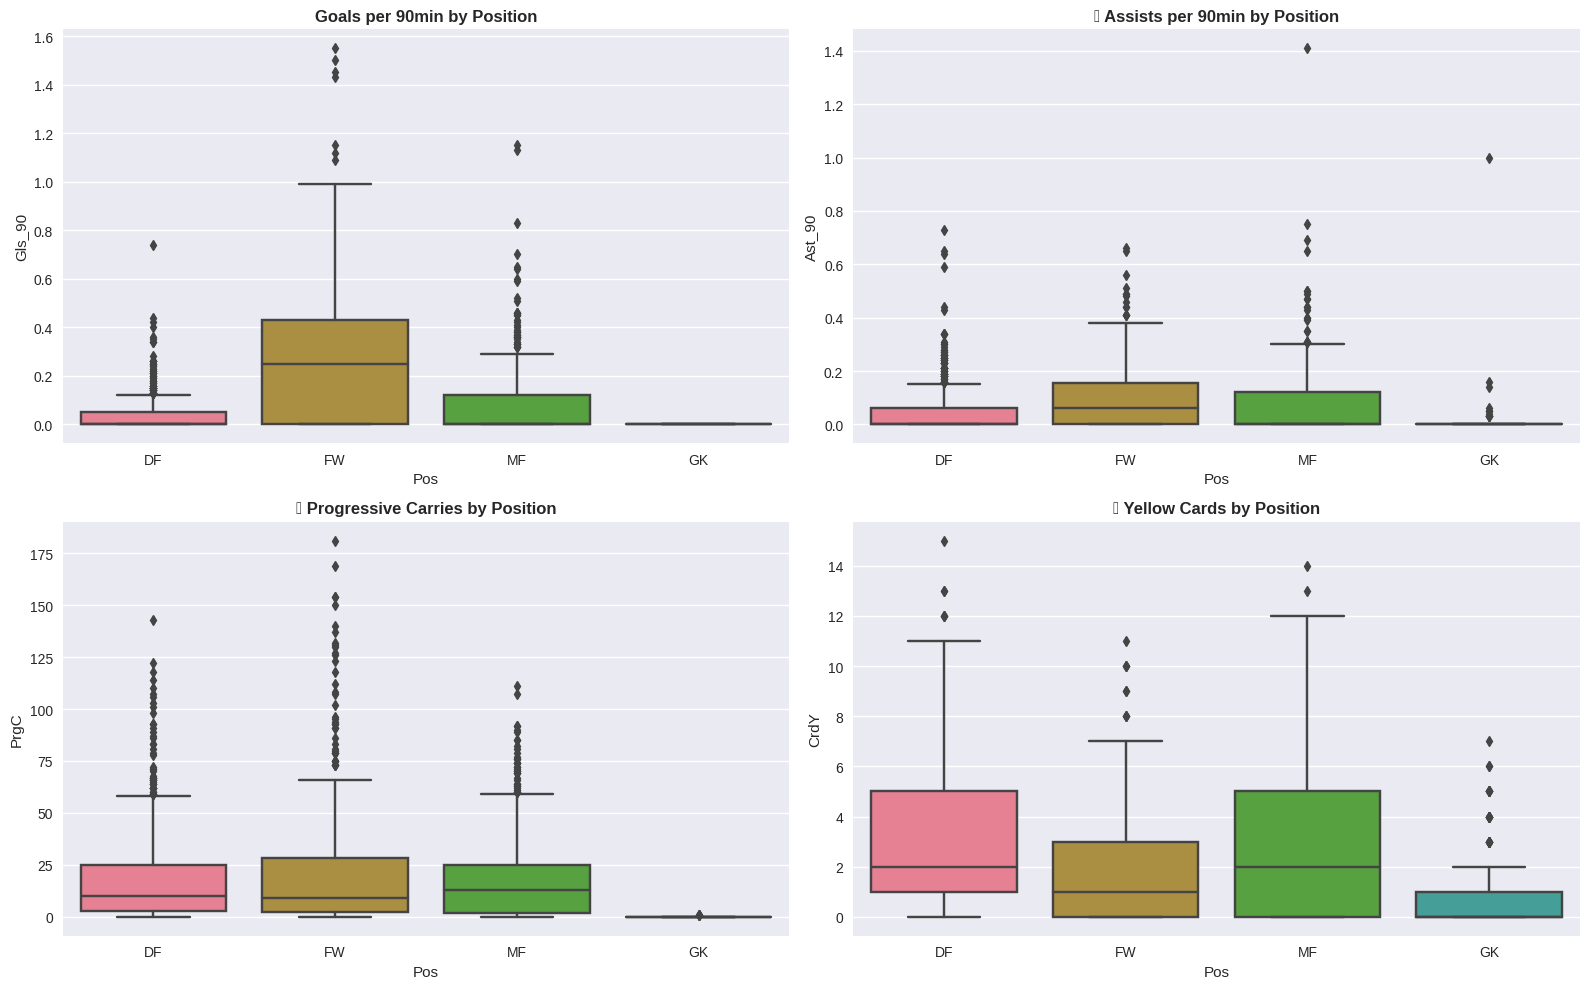

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Filter main positions
main_positions = ['FW', 'MF', 'DF', 'GK']
df_main_pos = df[df['Pos'].isin(main_positions)]

# Goals by position
sns.boxplot(data=df_main_pos, x='Pos', y='Gls_90', ax=axes[0, 0])
axes[0, 0].set_title('Goals per 90min by Position', fontsize=12, fontweight='bold')

# Assists by position
sns.boxplot(data=df_main_pos, x='Pos', y='Ast_90', ax=axes[0, 1])
axes[0, 1].set_title('🎯 Assists per 90min by Position', fontsize=12, fontweight='bold')

# Progressive actions by position
sns.boxplot(data=df_main_pos, x='Pos', y='PrgC', ax=axes[1, 0])
axes[1, 0].set_title('🏃 Progressive Carries by Position', fontsize=12, fontweight='bold')

# Cards by position
sns.boxplot(data=df_main_pos, x='Pos', y='CrdY', ax=axes[1, 1])
axes[1, 1].set_title('🟨 Yellow Cards by Position', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## 6. League Comparisons

### 6.1 League Performance Metrics

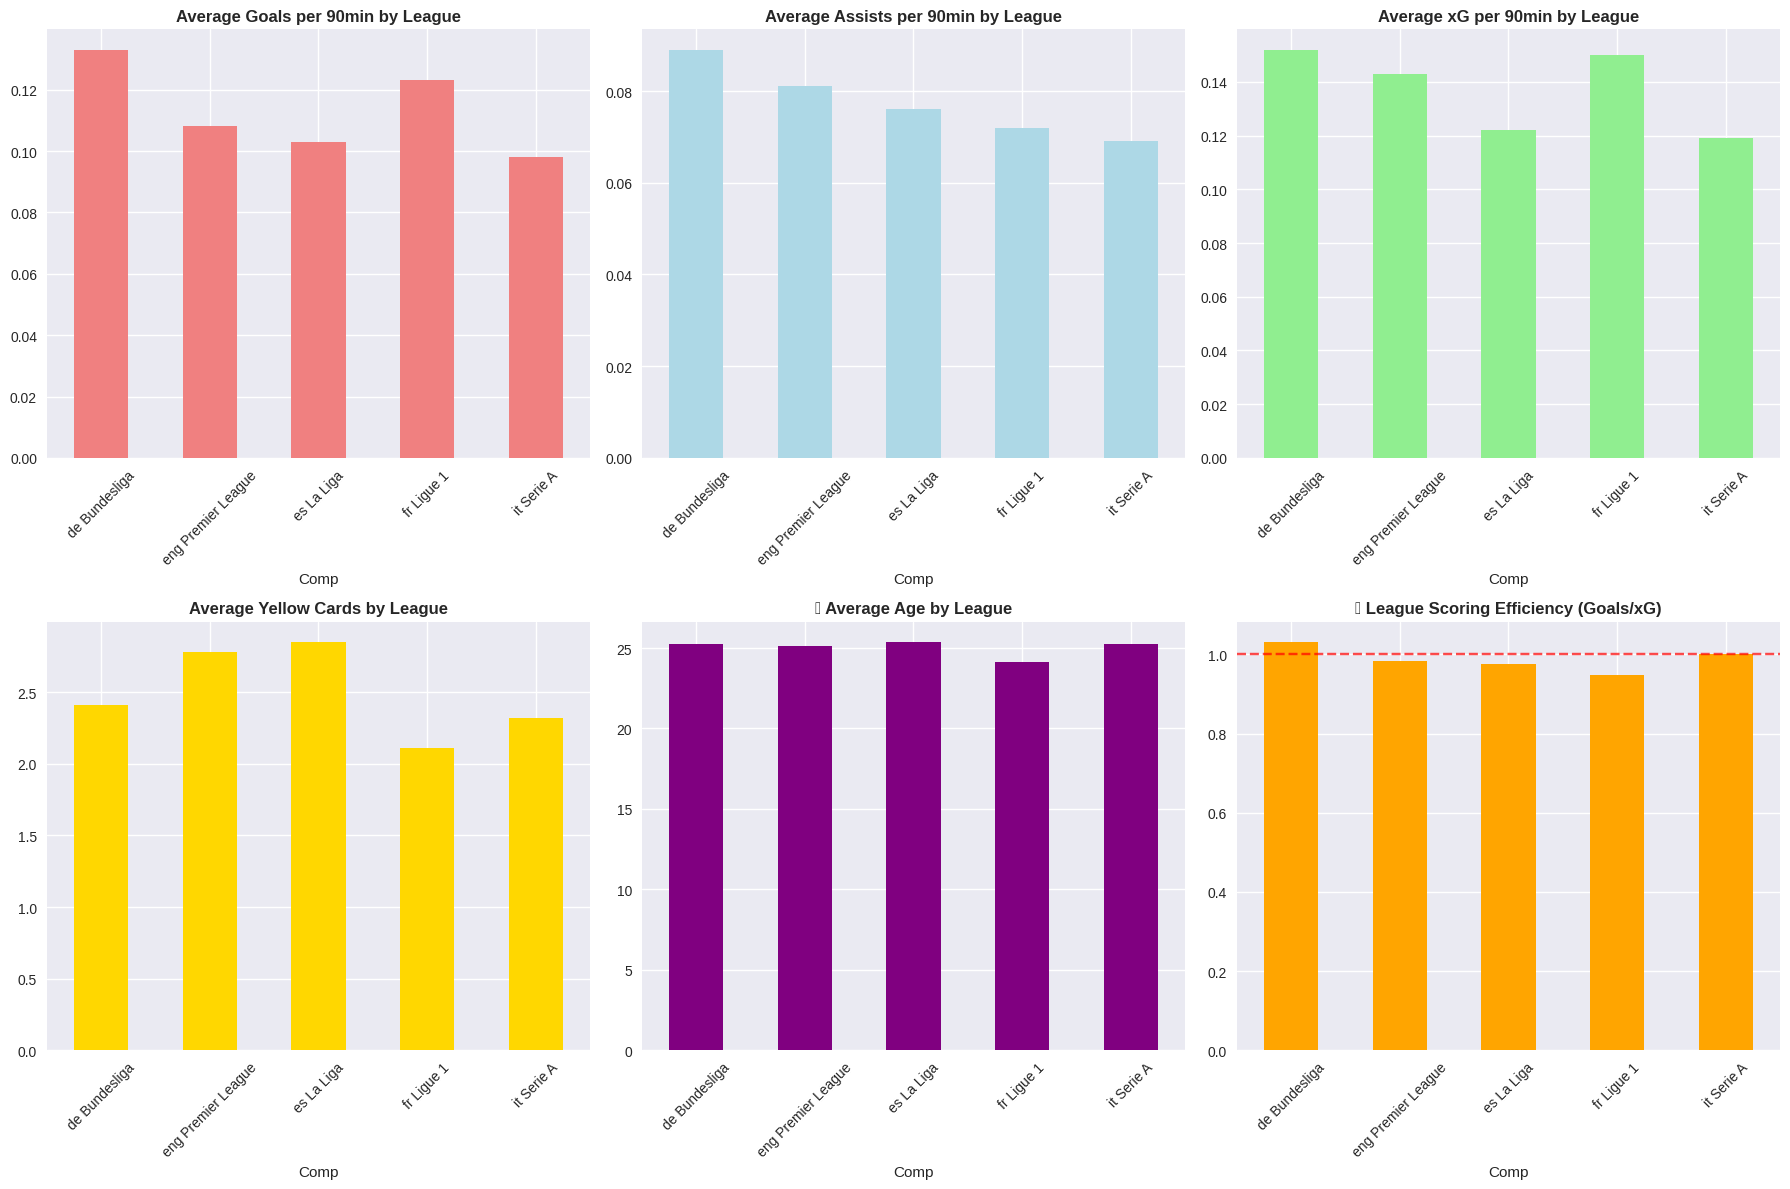


📊 League Comparison Summary:
                    Gls_90  Ast_90  xG_90  xAG_90   CrdY     Age
Comp                                                            
de Bundesliga        0.133   0.089  0.152   0.096  2.413  25.230
eng Premier League   0.108   0.081  0.143   0.094  2.782  25.098
es La Liga           0.103   0.076  0.122   0.080  2.849  25.359
fr Ligue 1           0.123   0.072  0.150   0.096  2.108  24.125
it Serie A           0.098   0.069  0.119   0.081  2.320  25.241


In [12]:
def create_league_comparison():
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Average goals per game by league
    league_stats = df.groupby('Comp').agg({
        'Gls_90': 'mean',
        'Ast_90': 'mean',
        'xG_90': 'mean',
        'xAG_90': 'mean',
        'CrdY': 'mean',
        'Age': 'mean'
    }).round(3)
    
    # Goals per 90
    league_stats['Gls_90'].plot(kind='bar', ax=axes[0, 0], color='lightcoral')
    axes[0, 0].set_title('Average Goals per 90min by League', fontsize=12, fontweight='bold')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Assists per 90
    league_stats['Ast_90'].plot(kind='bar', ax=axes[0, 1], color='lightblue')
    axes[0, 1].set_title('Average Assists per 90min by League', fontsize=12, fontweight='bold')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # xG per 90
    league_stats['xG_90'].plot(kind='bar', ax=axes[0, 2], color='lightgreen')
    axes[0, 2].set_title('Average xG per 90min by League', fontsize=12, fontweight='bold')
    axes[0, 2].tick_params(axis='x', rotation=45)
    
    # Yellow cards
    league_stats['CrdY'].plot(kind='bar', ax=axes[1, 0], color='gold')
    axes[1, 0].set_title('Average Yellow Cards by League', fontsize=12, fontweight='bold')
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # Age distribution
    league_stats['Age'].plot(kind='bar', ax=axes[1, 1], color='purple')
    axes[1, 1].set_title('👥 Average Age by League', fontsize=12, fontweight='bold')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    # League efficiency (Goals vs xG)
    league_efficiency = df.groupby('Comp').agg({
        'Gls': 'sum',
        'xG': 'sum'
    })
    league_efficiency['Efficiency'] = league_efficiency['Gls'] / league_efficiency['xG']
    
    league_efficiency['Efficiency'].plot(kind='bar', ax=axes[1, 2], color='orange')
    axes[1, 2].set_title('⚡ League Scoring Efficiency (Goals/xG)', fontsize=12, fontweight='bold')
    axes[1, 2].tick_params(axis='x', rotation=45)
    axes[1, 2].axhline(y=1, color='red', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    return league_stats

league_comparison = create_league_comparison()
print("\n📊 League Comparison Summary:")
print(league_comparison)

### 6.2 Interactive League Analysis

In [13]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def create_interactive_league_analysis(df):
    # Préparation des données
    league_summary = df.groupby('Comp').agg({
        'Player': 'count',
        'Gls': 'sum',
        'Ast': 'sum',
        'xG': 'sum',
        'xAG': 'sum',
        'Min': 'sum',
        'Age': 'mean'
    }).reset_index()
    
    league_summary.columns = [
        'League', 'Total_Players', 'Total_Goals', 'Total_Assists', 
        'Total_xG', 'Total_xAG', 'Total_Minutes', 'Avg_Age'
    ]
    
    # Création des sous-graphiques
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=(
            'Goals by League', 
            'Assists by League', 
            'xG vs Actual Goals', 
            'Player Count by League'
        )
    )
    
    # Graphique 1 : Goals by League
    fig.add_trace(
        go.Bar(
            x=league_summary['League'], 
            y=league_summary['Total_Goals'], 
            name='Goals', 
            marker_color='lightcoral'
        ),
        row=1, col=1
    )
    
    # Graphique 2 : Assists by League
    fig.add_trace(
        go.Bar(
            x=league_summary['League'], 
            y=league_summary['Total_Assists'], 
            name='Assists', 
            marker_color='lightblue'
        ),
        row=1, col=2
    )
    
    # Graphique 3 : xG vs Actual Goals
    fig.add_trace(
        go.Scatter(
            x=league_summary['Total_xG'], 
            y=league_summary['Total_Goals'],
            mode='markers+text', 
            text=league_summary['League'],
            textposition='top center', 
            name='xG vs Goals',
            marker=dict(size=12, color='lightgreen')
        ),
        row=2, col=1
    )
    
    # Graphique 4 : Player Count by League
    fig.add_trace(
        go.Bar(
            x=league_summary['League'], 
            y=league_summary['Total_Players'], 
            name='Players', 
            marker_color='gold'
        ),
        row=2, col=2
    )
    
    fig.update_layout(
        height=800, 
        showlegend=False, 
        title_text="🏆 Interactive League Analysis Dashboard"
    )
    fig.update_xaxes(tickangle=45)
    fig.show()

# Utilisation :
create_interactive_league_analysis(df)   

## 7. Player Profiling

### 7.1 Age Group Analysis


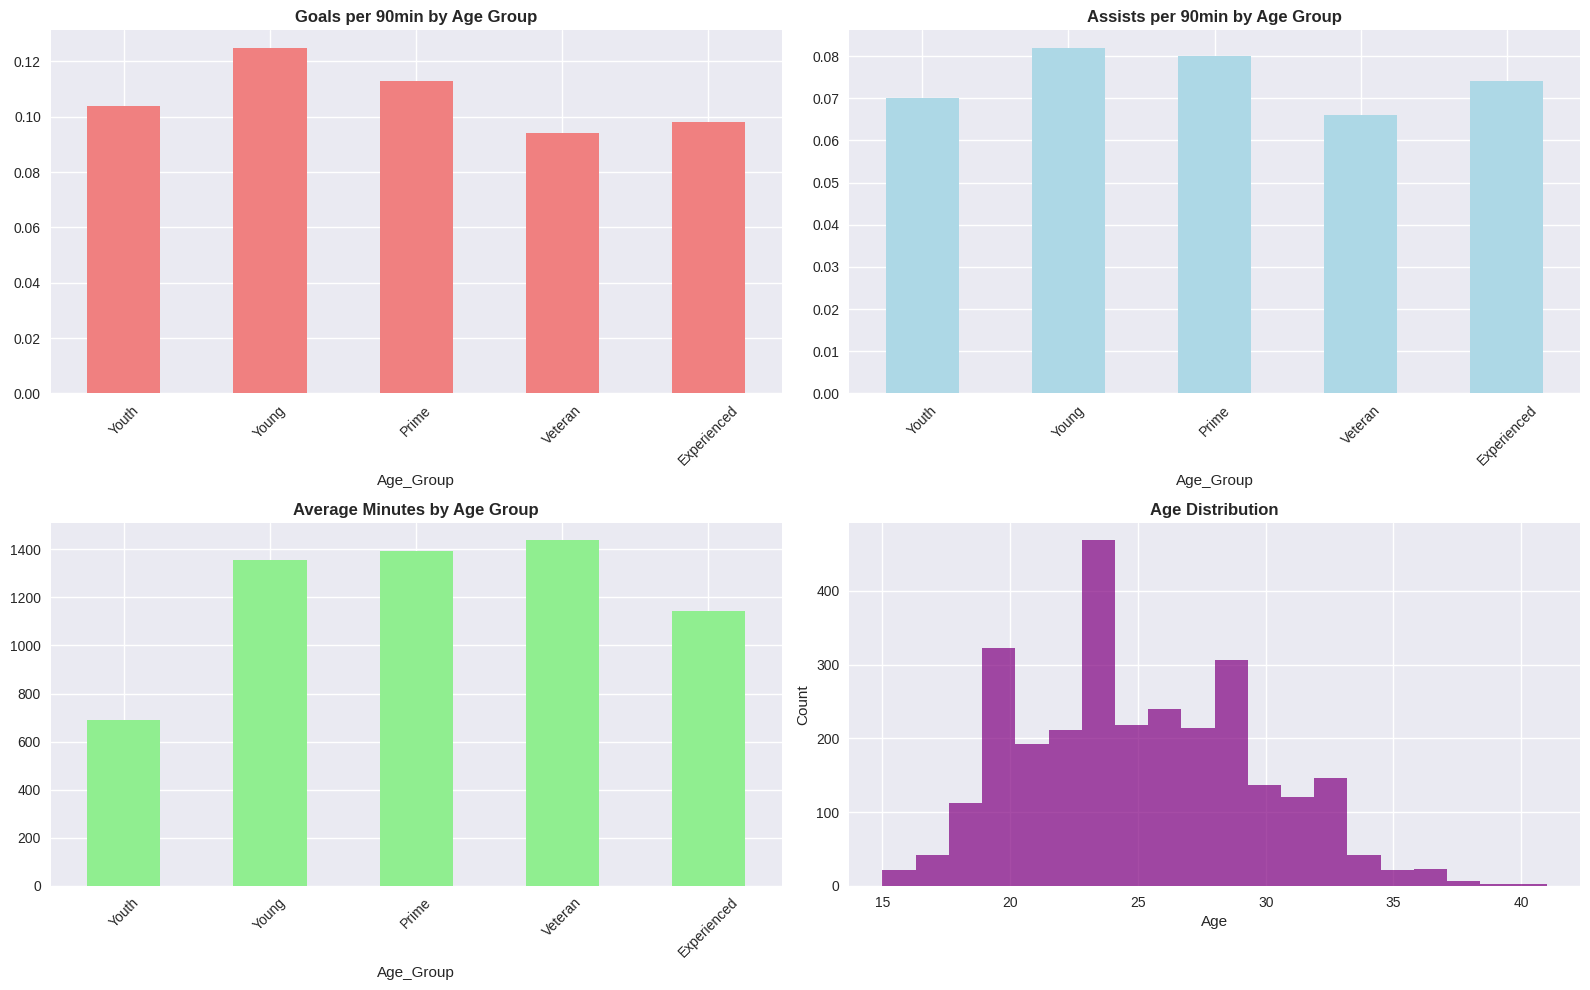

📊 Age Group Performance Summary:
             Gls_90  Ast_90  xG_90       Min
Age_Group                                   
Youth         0.104   0.070  0.143   688.675
Young         0.125   0.082  0.145  1353.227
Prime         0.113   0.080  0.131  1394.345
Veteran       0.094   0.066  0.118  1437.659
Experienced   0.098   0.074  0.087  1141.029


In [14]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Performance by age group
age_performance = df.groupby('Age_Group').agg({
    'Gls_90': 'mean',
    'Ast_90': 'mean',
    'xG_90': 'mean',
    'Min': 'mean'
}).round(3)

# Goals per 90 by age group
age_performance['Gls_90'].plot(kind='bar', ax=axes[0, 0], color='lightcoral')
axes[0, 0].set_title('Goals per 90min by Age Group', fontsize=12, fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=45)

# Assists per 90 by age group
age_performance['Ast_90'].plot(kind='bar', ax=axes[0, 1], color='lightblue')
axes[0, 1].set_title('Assists per 90min by Age Group', fontsize=12, fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)

# Average minutes by age group
age_performance['Min'].plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Average Minutes by Age Group', fontsize=12, fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)

# Age distribution
df['Age'].hist(bins=20, ax=axes[1, 1], color='purple', alpha=0.7)
axes[1, 1].set_title('Age Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

print("📊 Age Group Performance Summary:")
print(age_performance)

### 7.2 Playing Time Analysi

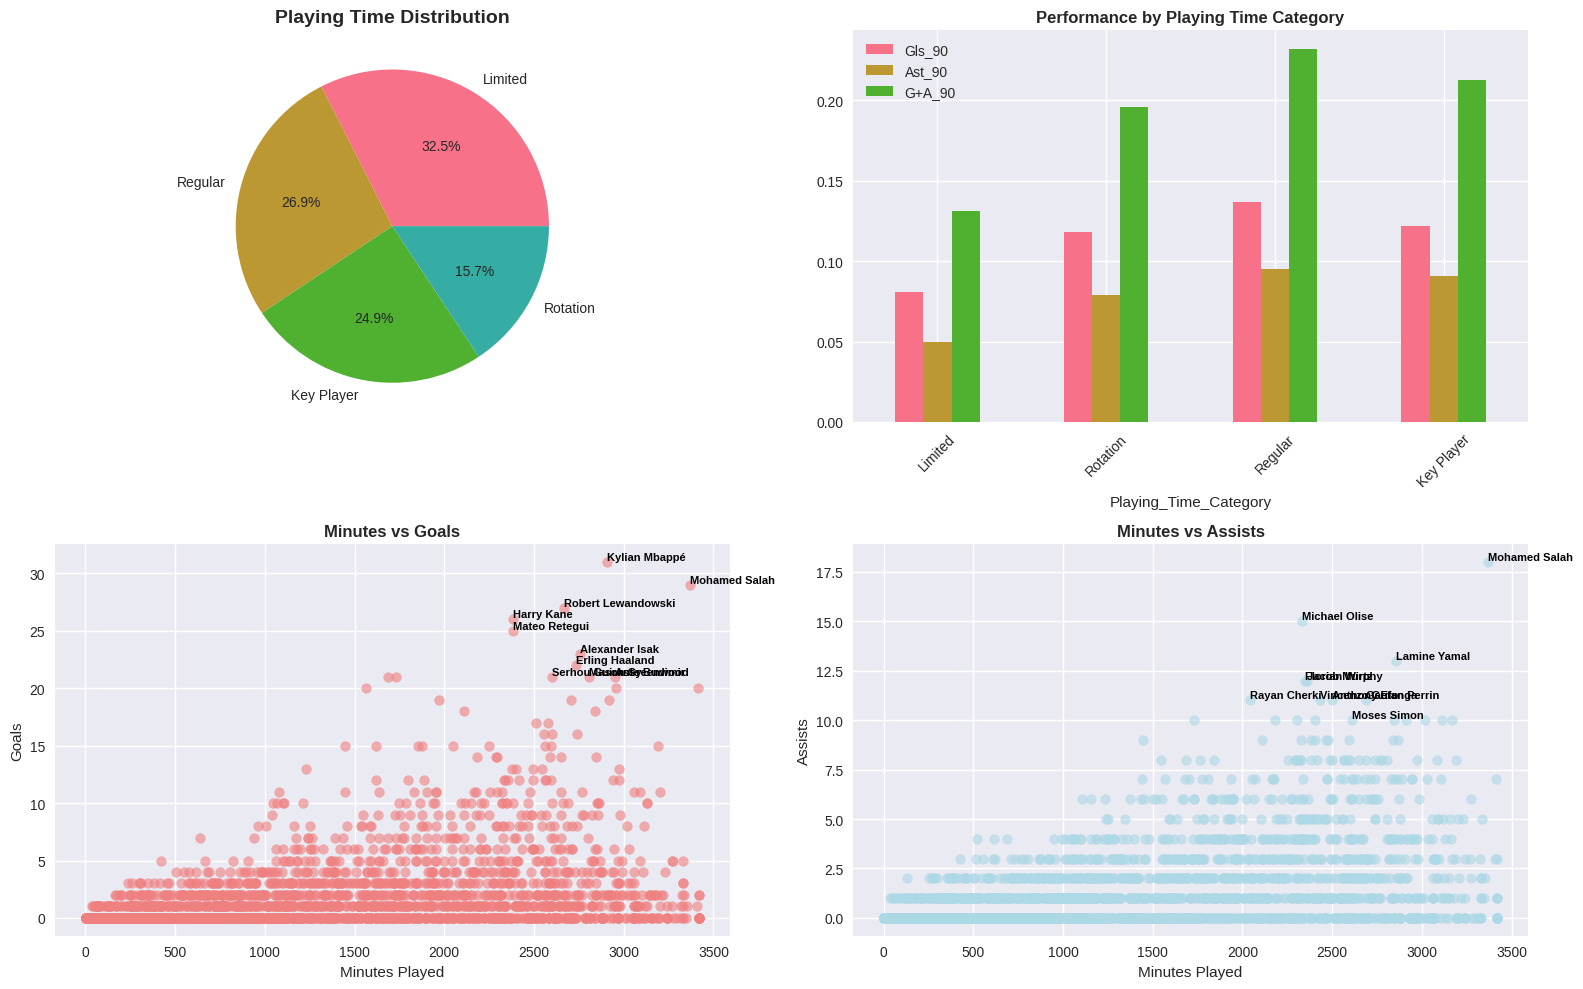

📊 Playing Time Performance Summary:
                       Gls_90  Ast_90  G+A_90
Playing_Time_Category                        
Limited                 0.081   0.050   0.131
Rotation                0.118   0.079   0.196
Regular                 0.137   0.095   0.232
Key Player              0.122   0.091   0.213


In [15]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Distribution des catégories de temps de jeu
playing_time_dist = df['Playing_Time_Category'].value_counts()
axes[0, 0].pie(playing_time_dist.values, labels=playing_time_dist.index, autopct='%1.1f%%')
axes[0, 0].set_title('Playing Time Distribution', fontsize=14, fontweight='bold')

# Performance par catégorie de temps de jeu
pt_performance = df.groupby('Playing_Time_Category').agg({
    'Gls_90': 'mean',
    'Ast_90': 'mean',
    'G+A_90': 'mean'
}).round(3)

pt_performance.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Performance by Playing Time Category', fontsize=12, fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend()

# Scatter Minutes vs Goals
axes[1, 0].scatter(df['Min'], df['Gls'], alpha=0.6, color='lightcoral')
axes[1, 0].set_xlabel('Minutes Played')
axes[1, 0].set_ylabel('Goals')
axes[1, 0].set_title('Minutes vs Goals', fontsize=12, fontweight='bold')

# TOP 10 j
top_goals = df.sort_values('Gls', ascending=False).head(10)
for _, row in top_goals.iterrows():
    axes[1, 0].text(row['Min'], row['Gls'], row['Player'], fontsize=8, fontweight='bold', color='black', ha='left', va='bottom')

# Scatter Minutes vs Assists
axes[1, 1].scatter(df['Min'], df['Ast'], alpha=0.6, color='lightblue')
axes[1, 1].set_xlabel('Minutes Played')
axes[1, 1].set_ylabel('Assists')
axes[1, 1].set_title('Minutes vs Assists', fontsize=12, fontweight='bold')

# TOP 10
top_assists = df.sort_values('Ast', ascending=False).head(10)
for _, row in top_assists.iterrows():
    axes[1, 1].text(row['Min'], row['Ast'], row['Player'], fontsize=8, fontweight='bold', color='black', ha='left', va='bottom')

plt.tight_layout()
plt.show()

print("📊 Playing Time Performance Summary:")
print(pt_performance)

## 8. Statistical Insights

### 8.1 Correlation Analysis

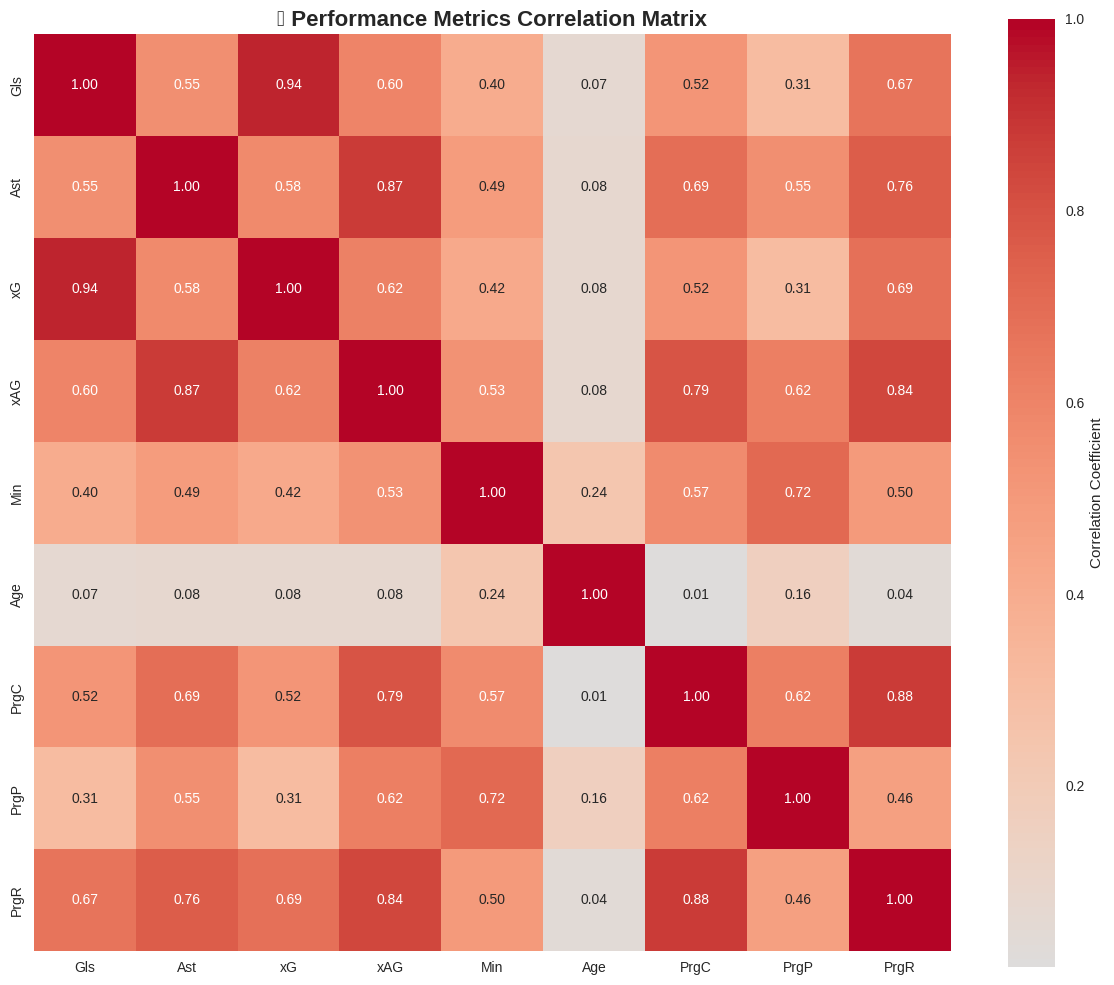

In [16]:
# Correlation matrix of key performance metrics
performance_cols = ['Gls', 'Ast', 'xG', 'xAG', 'Min', 'Age', 'PrgC', 'PrgP', 'PrgR']
correlation_matrix = df[performance_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('🔍 Performance Metrics Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [17]:
print("🔍 Key Correlations:")
print("=" * 50)
high_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr < 1.0]  # Remove self-correlations
print(high_corr.head(10))

🔍 Key Correlations:
Gls   xG      0.936921
xG    Gls     0.936921
PrgR  PrgC    0.877790
PrgC  PrgR    0.877790
xAG   Ast     0.873333
Ast   xAG     0.873333
xAG   PrgR    0.836309
PrgR  xAG     0.836309
PrgC  xAG     0.792293
xAG   PrgC    0.792293
dtype: float64


### 8.2 Performance Efficiency Analysis

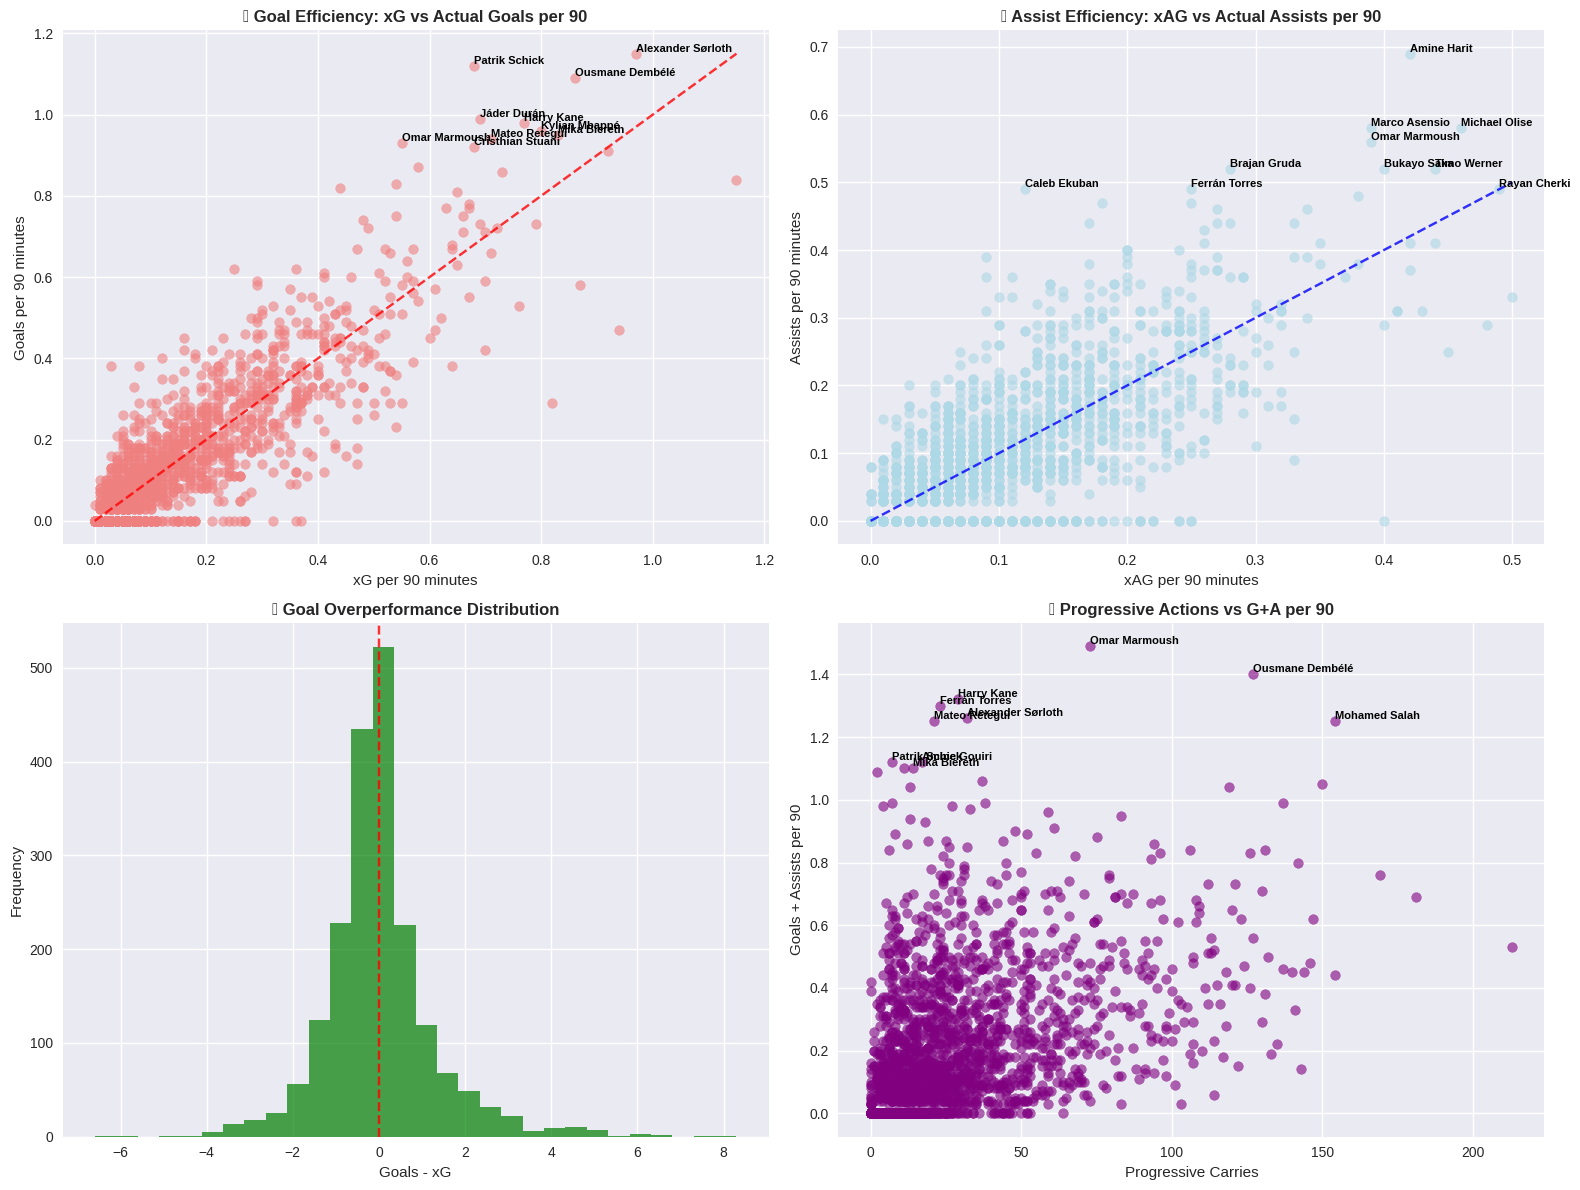

In [18]:
def create_efficiency_analysis(df):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Goal efficiency vs xG efficiency
    efficiency_data = df[df['90s'] >= 5].copy()  # Minimum 5 games equivalent
    
    # Scatter 1: xG_90 vs Gls_90
    axes[0, 0].scatter(efficiency_data['xG_90'], efficiency_data['Gls_90'], 
                       alpha=0.6, color='lightcoral')
    axes[0, 0].plot([0, efficiency_data['xG_90'].max()], 
                    [0, efficiency_data['xG_90'].max()], 'r--', alpha=0.8)
    axes[0, 0].set_xlabel('xG per 90 minutes')
    axes[0, 0].set_ylabel('Goals per 90 minutes')
    axes[0, 0].set_title('🎯 Goal Efficiency: xG vs Actual Goals per 90', fontsize=12, fontweight='bold')
    
    top_goals_90 = efficiency_data.sort_values('Gls_90', ascending=False).head(10)
    for _, row in top_goals_90.iterrows():
        axes[0, 0].text(row['xG_90'], row['Gls_90'], row['Player'], fontsize=8, fontweight='bold', color='black', ha='left', va='bottom')
    
    # Scatter 2: xAG_90 vs Ast_90
    axes[0, 1].scatter(efficiency_data['xAG_90'], efficiency_data['Ast_90'], 
                       alpha=0.6, color='lightblue')
    axes[0, 1].plot([0, efficiency_data['xAG_90'].max()], 
                    [0, efficiency_data['xAG_90'].max()], 'b--', alpha=0.8)
    axes[0, 1].set_xlabel('xAG per 90 minutes')
    axes[0, 1].set_ylabel('Assists per 90 minutes')
    axes[0, 1].set_title('🎯 Assist Efficiency: xAG vs Actual Assists per 90', fontsize=12, fontweight='bold')
    
    top_assists_90 = efficiency_data.sort_values('Ast_90', ascending=False).head(10)
    for _, row in top_assists_90.iterrows():
        axes[0, 1].text(row['xAG_90'], row['Ast_90'], row['Player'], fontsize=8, fontweight='bold', color='black', ha='left', va='bottom')
    
    # Histogram: Overperformance
    axes[1, 0].hist(efficiency_data['xG_Overperformance'], bins=30, alpha=0.7, color='green')
    axes[1, 0].axvline(x=0, color='red', linestyle='--', alpha=0.8)
    axes[1, 0].set_xlabel('Goals - xG')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('📈 Goal Overperformance Distribution', fontsize=12, fontweight='bold')
    
    # Scatter 3: PrgC vs G+A_90
    axes[1, 1].scatter(efficiency_data['PrgC'], efficiency_data['G+A_90'], 
                       alpha=0.6, color='purple')
    axes[1, 1].set_xlabel('Progressive Carries')
    axes[1, 1].set_ylabel('Goals + Assists per 90')
    axes[1, 1].set_title('🏃 Progressive Actions vs G+A per 90', fontsize=12, fontweight='bold')
    
    top_ga_90 = efficiency_data.sort_values('G+A_90', ascending=False).head(10)
    for _, row in top_ga_90.iterrows():
        axes[1, 1].text(row['PrgC'], row['G+A_90'], row['Player'], fontsize=8, fontweight='bold', color='black', ha='left', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Utilisation :
create_efficiency_analysis(df)

### 8.3 Advanced Metrics Summary

In [19]:
def create_advanced_summary():
    print("📊 ADVANCED PERFORMANCE METRICS SUMMARY")
    print("=" * 80)
    
    # Overall league statistics
    total_stats = {
        'Total Players': len(df),
        'Total Goals': df['Gls'].sum(),
        'Total Assists': df['Ast'].sum(),
        'Total xG': df['xG'].sum(),
        'Total Minutes': df['Min'].sum(),
        'Average Age': df['Age'].mean()
    }
    
    print("\n🏆 OVERALL STATISTICS:")
    for key, value in total_stats.items():
        if isinstance(value, float):
            print(f"{key}: {value:.2f}")
        else:
            print(f"{key}: {value:,}")
    
    # Top performers summary
    print(f"\n⭐ TOP PERFORMERS:")
    print(f"Top Scorer: {df.loc[df['Gls'].idxmax(), 'Player']} ({df['Gls'].max()} goals)")
    print(f"Top Assist Provider: {df.loc[df['Ast'].idxmax(), 'Player']} ({df['Ast'].max()} assists)")
    print(f"Most Minutes: {df.loc[df['Min'].idxmax(), 'Player']} ({df['Min'].max():,} minutes)")
    
    # Efficiency leaders (min 1000 minutes)
    qualified_players = df[df['Min'] >= 1000]
    print(f"\n⚡ EFFICIENCY LEADERS (1000+ minutes):")
    print(f"Goals per 90: {qualified_players.loc[qualified_players['Gls_90'].idxmax(), 'Player']} ({qualified_players['Gls_90'].max():.2f})")
    print(f"Assists per 90: {qualified_players.loc[qualified_players['Ast_90'].idxmax(), 'Player']} ({qualified_players['Ast_90'].max():.2f})")
    print(f"G+A per 90: {qualified_players.loc[qualified_players['G+A_90'].idxmax(), 'Player']} ({qualified_players['G+A_90'].max():.2f})")
    
    # League comparison
    print(f"\n🏟️ LEAGUE COMPARISON:")
    league_goals = df.groupby('Comp')['Gls'].sum().sort_values(ascending=False)
    for league, goals in league_goals.items():
        print(f"{league}: {goals} total goals")
    
    return total_stats, qualified_players

summary_stats, top_performers = create_advanced_summary()

📊 ADVANCED PERFORMANCE METRICS SUMMARY

🏆 OVERALL STATISTICS:
Total Players: 2,854
Total Goals: 4,806
Total Assists: 3,429
Total xG: 4870.20
Total Minutes: 3,459,684
Average Age: 25.02

⭐ TOP PERFORMERS:
Top Scorer: Kylian Mbappé (31 goals)
Top Assist Provider: Mohamed Salah (18 assists)
Most Minutes: Federico Baschirotto (3,420 minutes)

⚡ EFFICIENCY LEADERS (1000+ minutes):
Goals per 90: Alexander Sørloth (1.15)
Assists per 90: Michael Olise (0.58)
G+A per 90: Omar Marmoush (1.49)

🏟️ LEAGUE COMPARISON:
eng Premier League: 1082 total goals
es La Liga: 969 total goals
it Serie A: 936 total goals
de Bundesliga: 934 total goals
fr Ligue 1: 885 total goals


## 9. Key Insights & Player Spotlight

### 9.1 Elite Player Analysis

In [20]:
def analyze_elite_players():
    print("🌟 ELITE PLAYER ANALYSIS")
    print("=" * 60)
    
    # Define elite thresholds (top 5% in each category)
    thresholds = {
        'Goals': df['Gls'].quantile(0.95),
        'Assists': df['Ast'].quantile(0.95),
        'Minutes': df['Min'].quantile(0.90),  # Top 10% for minutes
        'G+A_90': df['G+A_90'].quantile(0.95)
    }
    
    print("📊 Elite Thresholds:")
    for metric, threshold in thresholds.items():
        print(f"{metric}: {threshold:.1f}")
    
    # Find elite players in multiple categories
    elite_scorers = df[df['Gls'] >= thresholds['Goals']]
    elite_assisters = df[df['Ast'] >= thresholds['Assists']]
    elite_performers = df[df['G+A_90'] >= thresholds['G+A_90']]
    
    print(f"\n⭐ ELITE CATEGORIES:")
    print(f"Elite Scorers (15+ goals): {len(elite_scorers)} players")
    print(f"Elite Assisters (8+ assists): {len(elite_assisters)} players")
    print(f"Elite Performers (0.8+ G+A per 90): {len(elite_performers)} players")
    
    # Multi-category elite players
    multi_elite = df[
        (df['Gls'] >= thresholds['Goals']) & 
        (df['Ast'] >= thresholds['Assists'])
    ]
    
    print(f"\n🏆 MULTI-CATEGORY ELITE PLAYERS:")
    if len(multi_elite) > 0:
        for _, player in multi_elite.iterrows():
            print(f"  • {player['Player']} ({player['Squad']}, {player['Comp']})")
            print(f"    Goals: {player['Gls']}, Assists: {player['Ast']}, G+A per 90: {player['G+A_90']:.2f}")
    else:
        print("  No players meet both elite scoring and assisting criteria")
    
    return elite_scorers, elite_assisters, elite_performers

elite_analysis = analyze_elite_players()

🌟 ELITE PLAYER ANALYSIS
📊 Elite Thresholds:
Goals: 8.0
Assists: 5.0
Minutes: 2636.0
G+A_90: 0.7

⭐ ELITE CATEGORIES:
Elite Scorers (15+ goals): 163 players
Elite Assisters (8+ assists): 190 players
Elite Performers (0.8+ G+A per 90): 148 players

🏆 MULTI-CATEGORY ELITE PLAYERS:
  • Mohamed Amoura (Wolfsburg, de Bundesliga)
    Goals: 10, Assists: 9, G+A per 90: 0.69
  • Iago Aspas (Celta Vigo, es La Liga)
    Goals: 10, Assists: 5, G+A per 90: 0.77
  • Bradley Barcola (Paris S-G, fr Ligue 1)
    Goals: 14, Assists: 10, G+A per 90: 0.99
  • Maximilian Beier (Dortmund, de Bundesliga)
    Goals: 8, Assists: 5, G+A per 90: 0.74
  • Jude Bellingham (Real Madrid, es La Liga)
    Goals: 9, Assists: 8, G+A per 90: 0.61
  • Jarrod Bowen (West Ham, eng Premier League)
    Goals: 13, Assists: 8, G+A per 90: 0.64
  • Rayan Cherki (Lyon, fr Ligue 1)
    Goals: 8, Assists: 11, G+A per 90: 0.84
  • Matheus Cunha (Wolves, eng Premier League)
    Goals: 15, Assists: 6, G+A per 90: 0.73
  • Jonathan Dav

### 9.2 Tactical Position Analysis

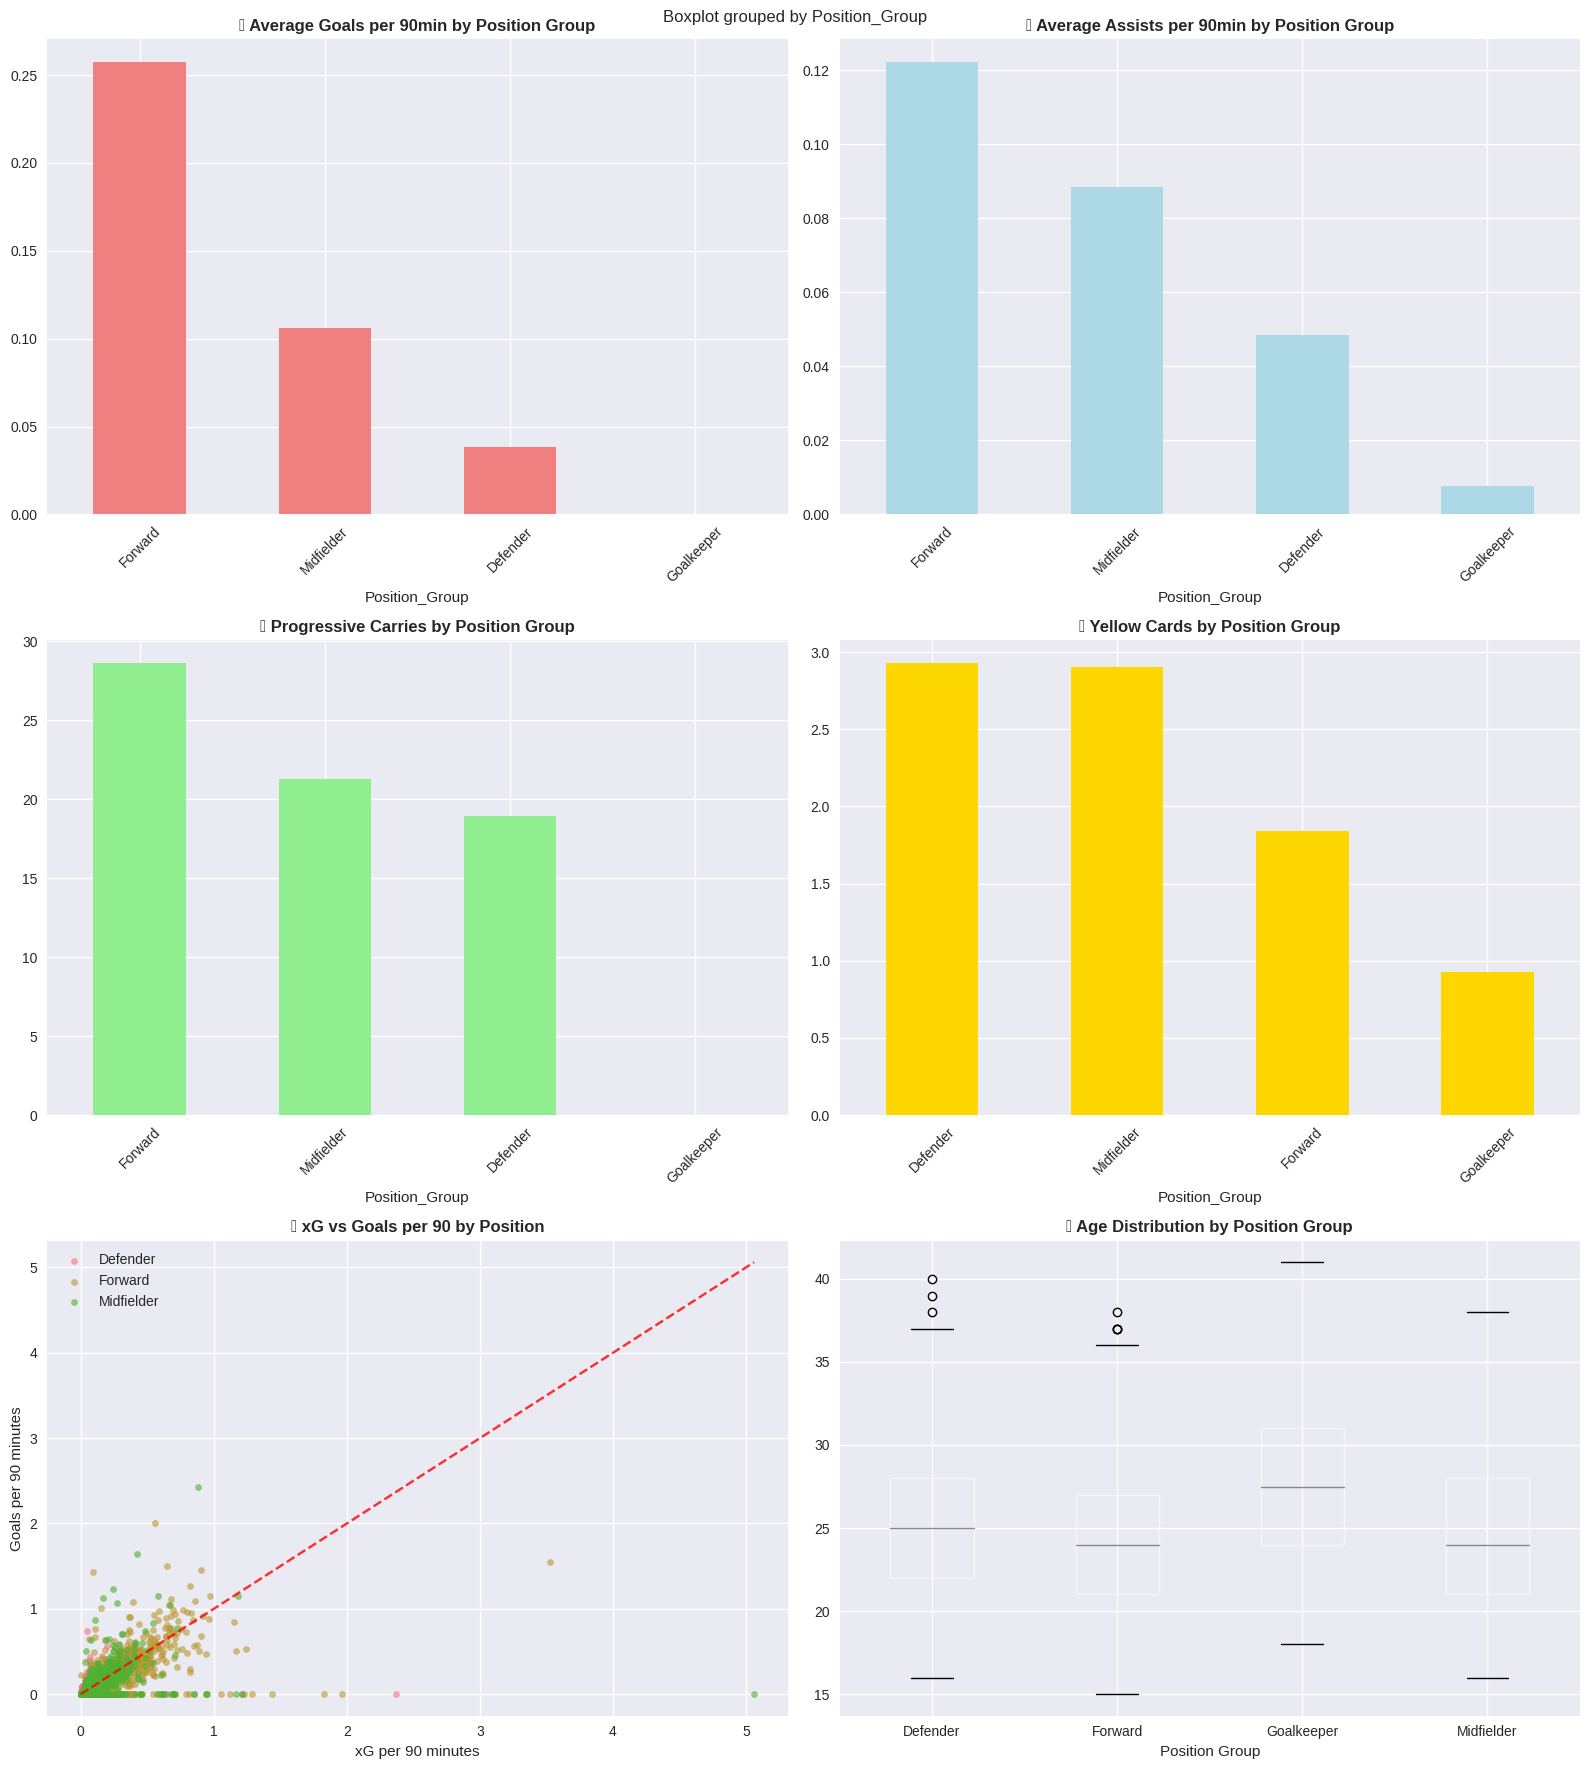

📊 TACTICAL POSITION ANALYSIS SUMMARY:
                Player    Age      Min  Gls_90  Ast_90  xG_90   PrgC  CrdY
Position_Group                                                            
Defender          1022  25.24  1333.72    0.04    0.05   0.05  18.95  2.93
Forward            720  24.50  1025.31    0.26    0.12   0.31  28.64  1.84
Goalkeeper         212  27.90  1487.43    0.00    0.01   0.00   0.02  0.92
Midfielder         900  24.50  1158.95    0.11    0.09   0.13  21.31  2.91


In [21]:
def create_tactical_analysis():
    fig, axes = plt.subplots(3, 2, figsize=(16, 18))
    
    # Create detailed position groups
    df['Position_Group'] = df['Pos'].map({
        'GK': 'Goalkeeper',
        'DF': 'Defender', 'DF,MF': 'Defender', 'DF,FW': 'Defender',
        'MF': 'Midfielder', 'MF,DF': 'Midfielder', 'MF,FW': 'Midfielder',
        'FW': 'Forward', 'FW,MF': 'Forward', 'FW,DF': 'Forward'
    })
    df['Position_Group'] = df['Position_Group'].fillna('Other')
    
    # Goals by position group
    pos_goals = df.groupby('Position_Group')['Gls_90'].mean().sort_values(ascending=False)
    pos_goals.plot(kind='bar', ax=axes[0, 0], color='lightcoral')
    axes[0, 0].set_title('🥅 Average Goals per 90min by Position Group', fontsize=12, fontweight='bold')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Assists by position group
    pos_assists = df.groupby('Position_Group')['Ast_90'].mean().sort_values(ascending=False)
    pos_assists.plot(kind='bar', ax=axes[0, 1], color='lightblue')
    axes[0, 1].set_title('🎯 Average Assists per 90min by Position Group', fontsize=12, fontweight='bold')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # Progressive actions by position
    pos_prog = df.groupby('Position_Group')['PrgC'].mean().sort_values(ascending=False)
    pos_prog.plot(kind='bar', ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('🏃 Progressive Carries by Position Group', fontsize=12, fontweight='bold')
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # Disciplinary by position
    pos_cards = df.groupby('Position_Group')['CrdY'].mean().sort_values(ascending=False)
    pos_cards.plot(kind='bar', ax=axes[1, 1], color='gold')
    axes[1, 1].set_title('🟨 Yellow Cards by Position Group', fontsize=12, fontweight='bold')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    # xG vs Actual Goals by position
    for pos in df['Position_Group'].unique():
        if pos != 'Goalkeeper':  # Exclude goalkeepers from goal analysis
            pos_data = df[df['Position_Group'] == pos]
            axes[2, 0].scatter(pos_data['xG_90'], pos_data['Gls_90'], 
                             label=pos, alpha=0.6, s=20)
    
    axes[2, 0].plot([0, df['xG_90'].max()], [0, df['xG_90'].max()], 'r--', alpha=0.8)
    axes[2, 0].set_xlabel('xG per 90 minutes')
    axes[2, 0].set_ylabel('Goals per 90 minutes')
    axes[2, 0].set_title('📈 xG vs Goals per 90 by Position', fontsize=12, fontweight='bold')
    axes[2, 0].legend()
    
    # Age distribution by position
    df[df['Position_Group'] != 'Other'].boxplot(column='Age', by='Position_Group', ax=axes[2, 1])
    axes[2, 1].set_title('👥 Age Distribution by Position Group', fontsize=12, fontweight='bold')
    axes[2, 1].set_xlabel('Position Group')
    
    plt.tight_layout()
    plt.show()
    
    # Position summary statistics
    pos_summary = df.groupby('Position_Group').agg({
        'Player': 'count',
        'Age': 'mean',
        'Min': 'mean',
        'Gls_90': 'mean',
        'Ast_90': 'mean',
        'xG_90': 'mean',
        'PrgC': 'mean',
        'CrdY': 'mean'
    }).round(2)
    
    print("📊 TACTICAL POSITION ANALYSIS SUMMARY:")
    print("=" * 60)
    print(pos_summary)
    
    return pos_summary

tactical_analysis = create_tactical_analysis()

### 9.3 League Quality & Style Analysis


🏟️ LEAGUE STYLE & QUALITY ANALYSIS
📈 LEAGUE STYLE INDICES:
                    Attacking_Index  Technical_Index  Physicality_Index  Experience_Index
Comp                                                                                     
de Bundesliga                  22.2             15.2               24.1              75.7
eng Premier League             18.9             14.3               27.8              75.3
es La Liga                     17.9             12.2               28.5              76.1
fr Ligue 1                     19.5             15.0               21.1              72.4
it Serie A                     16.7             11.9               23.2              75.7


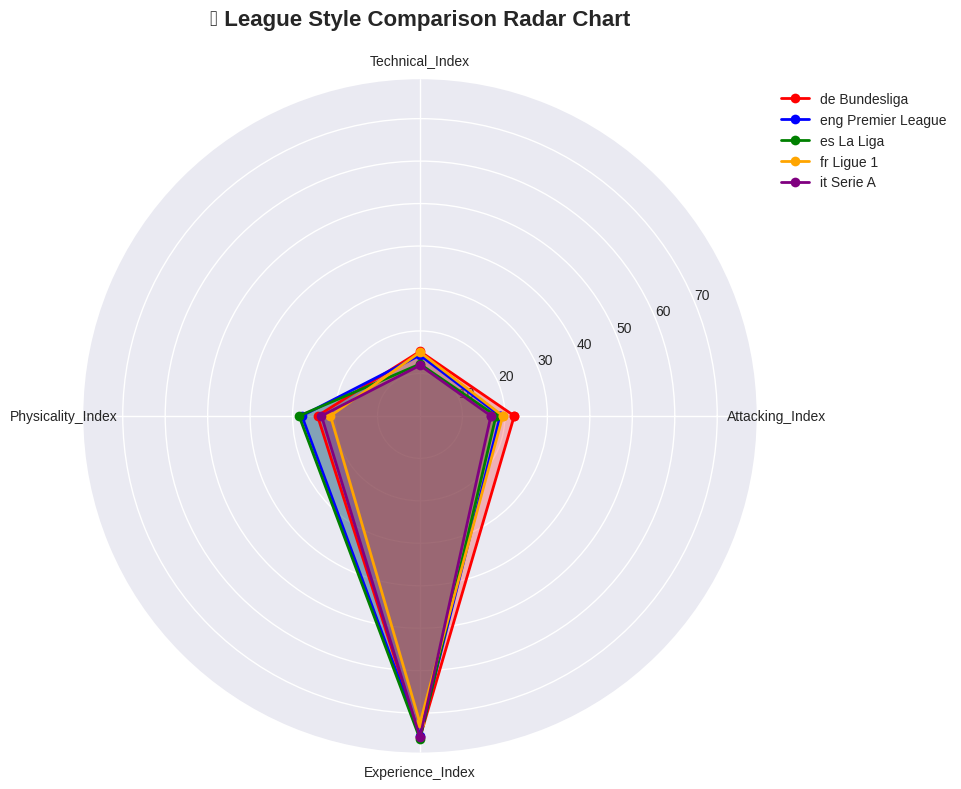

In [22]:
def analyze_league_styles():
    print("\n🏟️ LEAGUE STYLE & QUALITY ANALYSIS")
    print("=" * 70)
    
    league_styles = df.groupby('Comp').agg({
        'Gls_90': 'mean',           # Attacking output
        'Ast_90': 'mean',           # Creative output  
        'xG_90': 'mean',            # Quality of chances
        'PrgC': 'mean',             # Progressive play
        'CrdY': 'mean',             # Physicality/Discipline
        'Age': 'mean',              # Squad age
        'Player': 'count'           # Squad depth
    }).round(3)
    
    league_styles.columns = ['Goals_p90', 'Assists_p90', 'xG_p90', 'Prog_Carries', 
                            'Yellow_Cards', 'Avg_Age', 'Total_Players']
    
    # Calculate style metrics
    league_styles['Attacking_Index'] = (league_styles['Goals_p90'] + league_styles['Assists_p90']) * 100
    league_styles['Technical_Index'] = league_styles['xG_p90'] * 100
    league_styles['Physicality_Index'] = league_styles['Yellow_Cards'] * 10
    league_styles['Experience_Index'] = league_styles['Avg_Age'] * 3
    
    print("📈 LEAGUE STYLE INDICES:")
    style_metrics = league_styles[['Attacking_Index', 'Technical_Index', 'Physicality_Index', 'Experience_Index']]
    print(style_metrics.round(1))
    
    # Create radar chart for league comparison
    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(projection='polar'))
    
    angles = np.linspace(0, 2 * np.pi, len(style_metrics.columns), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))
    
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    
    for i, (league, values) in enumerate(style_metrics.iterrows()):
        values_plot = np.concatenate((values, [values[0]]))
        ax.plot(angles, values_plot, 'o-', linewidth=2, label=league, color=colors[i])
        ax.fill(angles, values_plot, alpha=0.25, color=colors[i])
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(style_metrics.columns)
    ax.set_title('🎯 League Style Comparison Radar Chart', size=16, fontweight='bold', pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return league_styles

league_analysis = analyze_league_styles()

## 10. Interactive Dashboard Creation 

In [23]:
def create_interactive_dashboard():
    # Prepare data for dashboard
    dashboard_data = df.copy()
    
    # Top performers data
    top_scorers = df.nlargest(20, 'Gls')[['Player', 'Squad', 'Comp', 'Gls', 'xG']]
    top_assisters = df.nlargest(20, 'Ast')[['Player', 'Squad', 'Comp', 'Ast', 'xAG']]
    
    # Create multi-tab dashboard
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('🥅 Top 20 Goalscorers', '🎯 Goals vs xG Analysis', 
                       '🏆 League Performance Comparison', '⚡ Player Efficiency Matrix'),
        specs=[[{"type": "bar"}, {"type": "scatter"}],
               [{"type": "bar"}, {"type": "scatter"}]]
    )
    
    # Top scorers bar chart
    fig.add_trace(
        go.Bar(
            y=[f"{p} ({s})" for p, s in zip(top_scorers['Player'], top_scorers['Squad'])],
            x=top_scorers['Gls'],
            orientation='h',
            name='Goals',
            marker_color='lightcoral',
            text=top_scorers['Gls'],
            textposition='auto'
        ),
        row=1, col=1
    )
    
    # Goals vs xG scatter
    fig.add_trace(
        go.Scatter(
            x=df['xG'],
            y=df['Gls'],
            mode='markers',
            name='Players',
            marker=dict(
                size=8,
                color=df['Min'],
                colorscale='Viridis',
                showscale=True,
                colorbar=dict(title="Minutes Played")
            ),
            text=[f"{p} ({s})" for p, s in zip(df['Player'], df['Squad'])],
            hovertemplate='<b>%{text}</b><br>xG: %{x}<br>Goals: %{y}<extra></extra>'
        ),
        row=1, col=2
    )
    
    # Add diagonal line for xG vs Goals
    max_val = max(df['xG'].max(), df['Gls'].max())
    fig.add_trace(
        go.Scatter(
            x=[0, max_val],
            y=[0, max_val],
            mode='lines',
            line=dict(dash='dash', color='red'),
            name='Perfect xG',
            showlegend=False
        ),
        row=1, col=2
    )
    
    # League comparison
    league_comparison = df.groupby('Comp').agg({
        'Gls': 'sum',
        'Ast': 'sum',
        'Player': 'count'
    }).reset_index()
    
    fig.add_trace(
        go.Bar(
            x=league_comparison['Comp'],
            y=league_comparison['Gls'],
            name='Total Goals',
            marker_color='lightblue'
        ),
        row=2, col=1
    )
    
    # Player efficiency matrix (Goals per 90 vs Assists per 90)
    qualified = df[df['Min'] >= 500]  # Players with significant minutes
    fig.add_trace(
        go.Scatter(
            x=qualified['Gls_90'],
            y=qualified['Ast_90'],
            mode='markers',
            name='Player Efficiency',
            marker=dict(
                size=10,
                color=qualified['G+A_90'],
                colorscale='RdYlBu_r',
                showscale=True,
                colorbar=dict(title="G+A per 90", x=1.02)
            ),
            text=[f"{p} ({s})" for p, s in zip(qualified['Player'], qualified['Squad'])],
            hovertemplate='<b>%{text}</b><br>Goals/90: %{x:.2f}<br>Assists/90: %{y:.2f}<extra></extra>'
        ),
        row=2, col=2
    )
    
    # Update layout
    fig.update_layout(
        height=1000,
        title_text="🏆 European Football Analytics Dashboard",
        title_x=0.5,
        title_font_size=20,
        showlegend=False
    )
    
    # Update axes labels
    fig.update_xaxes(title_text="Goals", row=1, col=1)
    fig.update_xaxes(title_text="Expected Goals (xG)", row=1, col=2)
    fig.update_xaxes(title_text="League", row=2, col=1)
    fig.update_xaxes(title_text="Goals per 90 minutes", row=2, col=2)
    
    fig.update_yaxes(title_text="Player", row=1, col=1)
    fig.update_yaxes(title_text="Actual Goals", row=1, col=2)
    fig.update_yaxes(title_text="Total Goals", row=2, col=1)
    fig.update_yaxes(title_text="Assists per 90 minutes", row=2, col=2)
    
    fig.show()

create_interactive_dashboard()

## 11.Conclusions

In [24]:
def generate_final_report():
    print("🏆 EUROPEAN FOOTBALL ANALYTICS - FINAL REPORT")
    print("=" * 80)
    
    # Key findings
    total_players = len(df)
    total_goals = df['Gls'].sum()
    total_assists = df['Ast'].sum()
    avg_age = df['Age'].mean()
    
    print(f"\n📊 DATASET OVERVIEW:")
    print(f"  • Total Players Analyzed: {total_players:,}")
    print(f"  • Total Goals Scored: {total_goals:,}")
    print(f"  • Total Assists Recorded: {total_assists:,}")
    print(f"  • Average Player Age: {avg_age:.1f} years")
    
    # League insights
    print(f"\n🏟️ LEAGUE INSIGHTS:")
    league_players = df.groupby('Comp')['Player'].count().sort_values(ascending=False)
    most_players_league = league_players.index[0]
    
    league_goals = df.groupby('Comp')['Gls'].sum().sort_values(ascending=False)
    most_goals_league = league_goals.index[0]
    
    print(f"  • Most Players: {most_players_league} ({league_players.iloc[0]} players)")
    print(f"  • Most Goals: {most_goals_league} ({league_goals.iloc[0]} goals)")
    
    # Performance insights
    print(f"\n⭐ PERFORMANCE INSIGHTS:")
    top_scorer = df.loc[df['Gls'].idxmax()]
    top_assister = df.loc[df['Ast'].idxmax()]
    
    print(f"  • Top Scorer: {top_scorer['Player']} ({top_scorer['Squad']}) - {top_scorer['Gls']} goals")
    print(f"  • Top Assister: {top_assister['Player']} ({top_assister['Squad']}) - {top_assister['Ast']} assists")
    
    # Efficiency insights
    qualified_players = df[df['Min'] >= 1000]
    most_efficient_scorer = qualified_players.loc[qualified_players['Gls_90'].idxmax()]
    most_efficient_assister = qualified_players.loc[qualified_players['Ast_90'].idxmax()]
    
    print(f"  • Most Efficient Scorer (1000+ min): {most_efficient_scorer['Player']} ({most_efficient_scorer['Gls_90']:.2f} goals/90)")
    print(f"  • Most Efficient Assister (1000+ min): {most_efficient_assister['Player']} ({most_efficient_assister['Ast_90']:.2f} assists/90)")
    
    # Age insights
    print(f"\n👥 AGE INSIGHTS:")
    youngest = df.loc[df['Age'].idxmin()]
    oldest = df.loc[df['Age'].idxmax()]
    
    print(f"  • Youngest Player: {youngest['Player']} ({youngest['Age']:.0f} years)")
    print(f"  • Oldest Player: {oldest['Player']} ({oldest['Age']:.0f} years)")
    
    # xG insights
    print(f"\n📈 ADVANCED METRICS INSIGHTS:")
    total_xg = df['xG'].sum()
    xg_efficiency = total_goals / total_xg
    
    biggest_overperformer = df.loc[df['xG_Overperformance'].idxmax()]
    biggest_underperformer = df.loc[df['xG_Overperformance'].idxmin()]
    
    print(f"  • Total xG: {total_xg:.1f}")
    print(f"  • Overall xG Efficiency: {xg_efficiency:.2f}")
    print(f"  • Biggest xG Overperformer: {biggest_overperformer['Player']} (+{biggest_overperformer['xG_Overperformance']:.1f})")
    print(f"  • Biggest xG Underperformer: {biggest_underperformer['Player']} ({biggest_underperformer['xG_Overperformance']:.1f})")
    
    print(f"\n🎯 KEY TAKEAWAYS:")
    print(f"  1. The dataset provides comprehensive coverage of Europe's top 5 leagues")
    print(f"  2. {most_goals_league} shows the highest goal-scoring output")
    print(f"  3. Player ages range from {df['Age'].min():.0f} to {df['Age'].max():.0f} years")
    print(f"  4. Expected goals metrics reveal interesting over/under-performance patterns")
    print(f"  5. Progressive actions correlate strongly with offensive contributions")
    
    print(f"\n💡 RECOMMENDATIONS FOR FURTHER ANALYSIS:")
    print(f"  • Investigate seasonal trends and player development")
    print(f"  • Analyze team-level performance and tactics")
    print(f"  • Compare performance across different competitions")
    print(f"  • Study injury impact on performance metrics")
    print(f"  • Develop predictive models for player performance")

generate_final_report()

🏆 EUROPEAN FOOTBALL ANALYTICS - FINAL REPORT

📊 DATASET OVERVIEW:
  • Total Players Analyzed: 2,854
  • Total Goals Scored: 4,806
  • Total Assists Recorded: 3,429
  • Average Player Age: 25.0 years

🏟️ LEAGUE INSIGHTS:
  • Most Players: it Serie A (634 players)
  • Most Goals: eng Premier League (1082 goals)

⭐ PERFORMANCE INSIGHTS:
  • Top Scorer: Kylian Mbappé (Real Madrid) - 31 goals
  • Top Assister: Mohamed Salah (Liverpool) - 18 assists
  • Most Efficient Scorer (1000+ min): Alexander Sørloth (1.15 goals/90)
  • Most Efficient Assister (1000+ min): Michael Olise (0.58 assists/90)

👥 AGE INSIGHTS:
  • Youngest Player: Harry Howell (15 years)
  • Oldest Player: Pepe Reina (41 years)

📈 ADVANCED METRICS INSIGHTS:
  • Total xG: 4870.2
  • Overall xG Efficiency: 0.99
  • Biggest xG Overperformer: Patrik Schick (+8.3)
  • Biggest xG Underperformer: Hugo Ekitike (-6.6)

🎯 KEY TAKEAWAYS:
  1. The dataset provides comprehensive coverage of Europe's top 5 leagues
  2. eng Premier League s

In [25]:
def create_export_tables():
    print("💾 CREATING EXPORT TABLES")
    print("=" * 50)
    
    # Top performers table
    top_all_around = df.nlargest(50, 'G+A')[['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 
                                            'MP', 'Min', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 
                                            'Gls_90', 'Ast_90', 'G+A_90']]
    
    print("✅ Top 50 all-around performers table created")
    
    # League summary table
    league_summary = df.groupby('Comp').agg({
        'Player': 'count',
        'Age': 'mean',
        'Gls': ['sum', 'mean'],
        'Ast': ['sum', 'mean'],
        'xG': 'sum',
        'xAG': 'sum',
        'Min': 'sum',
        'CrdY': 'sum',
        'CrdR': 'sum'
    }).round(2)
    
    # Flatten column names
    league_summary.columns = ['_'.join(col).strip() for col in league_summary.columns]
    
    print("✅ League summary table created")
    
    # Position analysis table
    position_analysis = df.groupby('Pos').agg({
        'Player': 'count',
        'Age': 'mean',
        'Min': 'mean',
        'Gls_90': 'mean',
        'Ast_90': 'mean',
        'xG_90': 'mean',
        'PrgC': 'mean'
    }).round(3)
    
    print("✅ Position analysis table created")
    
    # Display sample of each table
    print(f"\n📋 TOP PERFORMERS SAMPLE:")
    print(top_all_around.head(10).to_string())
    
    print(f"\n📋 LEAGUE SUMMARY:")
    print(league_summary.to_string())
    
    return top_all_around, league_summary, position_analysis

export_tables = create_export_tables()

💾 CREATING EXPORT TABLES
✅ Top 50 all-around performers table created
✅ League summary table created
✅ Position analysis table created

📋 TOP PERFORMERS SAMPLE:
                  Player   Nation    Pos          Squad                Comp   Age  MP   Min  Gls  Ast  G+A    xG   xAG  Gls_90  Ast_90  G+A_90
2304       Mohamed Salah   eg EGY     FW      Liverpool  eng Premier League  32.0  38  3371   29   18   47  25.2  14.2    0.77    0.48    1.25
1317          Harry Kane  eng ENG     FW  Bayern Munich       de Bundesliga  31.0  31  2381   26    9   35  20.3   5.3    0.98    0.34    1.32
1691       Kylian Mbappé   fr FRA     FW    Real Madrid          es La Liga  25.0  34  2907   31    3   34  25.9   7.7    0.96    0.09    1.05
2201       Mateo Retegui   it ITA     FW       Atalanta          it Serie A  25.0  36  2383   25    8   33  18.9   4.9    0.94    0.30    1.25
1219      Alexander Isak   se SWE     FW  Newcastle Utd  eng Premier League  24.0  34  2756   23    6   29  20.3   4.3    0.

## 📚 Data Dictionary & Methodology

**Key Metrics Explained:**
- **xG (Expected Goals)**: Statistical measure of shot quality
- **xAG (Expected Assisted Goals)**: Quality of assists provided
- **Progressive Actions**: Carries/passes moving ball significantly toward goal
- **90s**: Games played equivalent (minutes/90)
- **G+A**: Goals plus assists combined
- **npxG**: Non-penalty expected goals

**Analysis Methods:**
- Correlation analysis for metric relationships
- Quantile-based elite player identification
- League style indexing using weighted metrics
- Per-90 minute normalization for fair comparisons

**Visualization Standards:**
- Professional color palettes
- Clear titles and labels
- Statistical significance indicators
- Interactive elements for exploration

---

*This notebook provides a comprehensive foundation for football analytics. Feel free to extend the analysis with additional metrics, time-series data, or predictive modeling.*